<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1901-1950.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1651]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1652]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


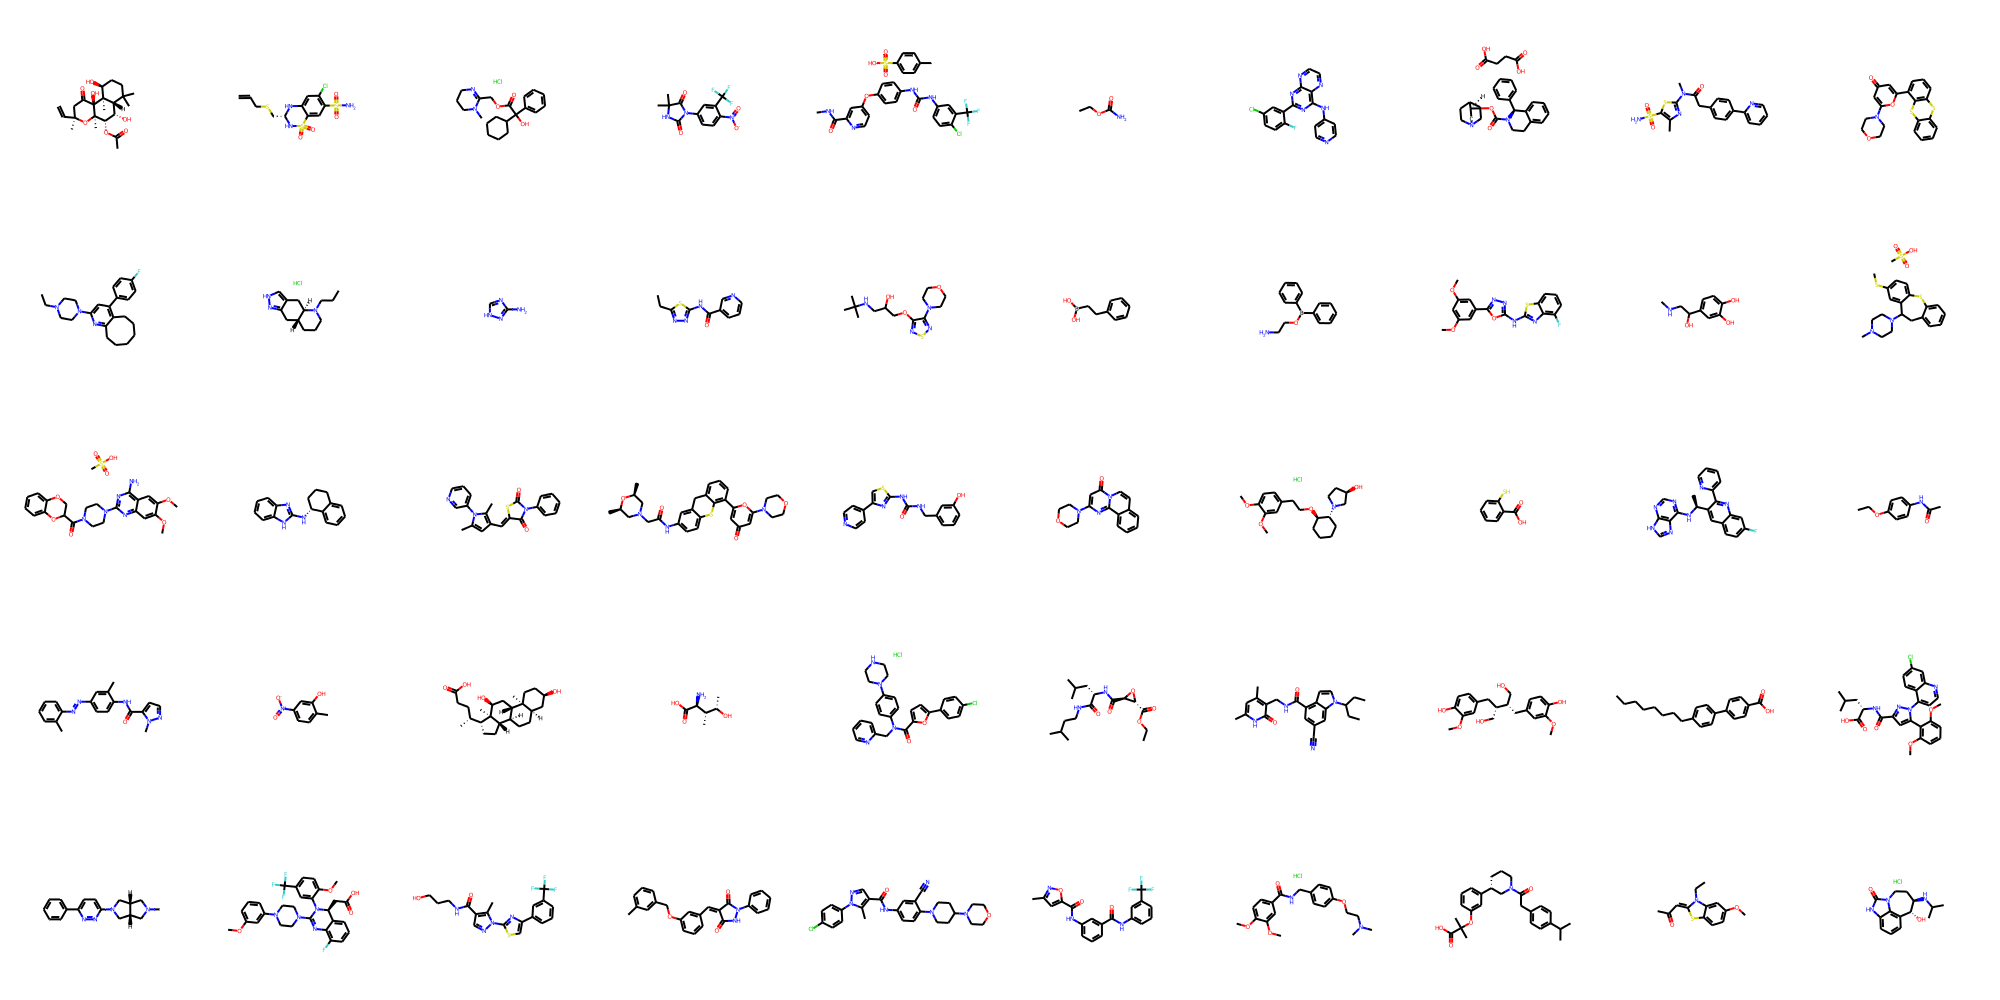

In [1653]:
smiles_list = [
'C=C[C@@]1(C)CC(=O)[C@@]2(O)[C@](C)(O1)[C@@H](OC(C)=O)[C@@H](O)[C@H]1C(C)(C)CC[C@H](O)[C@@]12C',
'C=CCSC[C@@H]1Nc2cc(Cl)c(S(N)(=O)=O)cc2S(=O)(=O)N1',
'CN1CCCN=C1COC(=O)C(O)(c1ccccc1)C1CCCCC1.Cl',
'CC1(C)NC(=O)N(c2ccc([N+](=O)[O-])c(C(F)(F)F)c2)C1=O',
'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1.Cc1ccc(S(=O)(=O)O)cc1',
'CCOC(N)=O',
'Fc1ccc(Cl)cc1-c1nc(Nc2ccncc2)c2nccnc2n1',
'O=C(O)CCC(=O)O.O=C(O[C@H]1CN2CCC1CC2)N1CCc2ccccc2[C@@H]1c1ccccc1',
'Cc1nc(N(C)C(=O)Cc2ccc(-c3ccccn3)cc2)sc1S(N)(=O)=O',
'O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1',
'CCN1CCN(c2cc(-c3ccc(F)cc3)c3c(n2)CCCCCC3)CC1',
'CCCN1CCC[C@@H]2Cc3n[nH]cc3C[C@H]21.Cl',
'Nc1nc[nH]n1',
'CCc1nnc(NC(=O)c2cccnc2)s1',
'CC(C)(C)NCC(O)COc1nsnc1N1CCOCC1',
'OB(O)CCc1ccccc1',
'NCCOB(c1ccccc1)c1ccccc1',
'COc1cc(OC)cc(-c2nnc(Nc3nc4c(F)cccc4s3)o2)c1',
'CNCC(O)c1ccc(O)c(O)c1',
'CS(=O)(=O)O.CSc1ccc2c(c1)C(N1CCN(C)CC1)Cc1ccccc1S2',
'COc1cc2nc(N3CCN(C(=O)C4COc5ccccc5O4)CC3)nc(N)c2cc1OC.CS(=O)(=O)O',
'c1ccc2c(c1)CCC[C@H]2Nc1nc2ccccc2[nH]1',
'Cc1cc(/C=C2\SC(=O)N(c3ccccc3)C2=O)c(C)n1-c1cccnc1',
'C[C@H]1CN(CC(=O)Nc2ccc3c(c2)Cc2cccc(-c4cc(=O)cc(N5CCOCC5)o4)c2S3)C[C@@H](C)O1',
'O=C(NCc1cccc(O)c1)Nc1nc(-c2ccncc2)cs1',
'O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12',
'COc1ccc(CCO[C@@H]2CCCC[C@H]2N2CC[C@@H](O)C2)cc1OC.Cl',
'O=C(O)c1ccccc1S',
'C[C@H](Nc1ncnc2[nH]cnc12)c1cc2ccc(F)cc2nc1-c1ccccn1',
'CCOc1ccc(NC(C)=O)cc1',
'Cc1ccccc1/N=N/c1ccc(NC(=O)c2ccnn2C)c(C)c1',
'Cc1ccc([N+](=O)[O-])cc1O',
'C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C@H](O)CC[C@]4(C)[C@H]3C[C@H](O)[C@@]21C',
'C[C@H](O)[C@H](C)[C@H](N)C(=O)O',
'Cl.O=C(c1ccc(-c2ccc(Cl)cc2)o1)N(Cc1ccccn1)c1ccc(N2CCNCC2)cc1',
'CCOC(=O)[C@H]1O[C@@H]1C(=O)N[C@@H](CC(C)C)C(=O)NCCC(C)C',
'CCC(CC)n1ccc2c(C(=O)NCc3c(C)cc(C)[nH]c3=O)cc(C#N)cc21',
'COc1cc(C[C@@H](CO)[C@H](CO)Cc2ccc(O)c(OC)c2)ccc1O',
'CCCCCCCCc1ccc(-c2ccc(C(=O)O)cc2)cc1',
'COc1cccc(OC)c1-c1cc(C(=O)N[C@@H](CC(C)C)C(=O)O)nn1-c1ccnc2cc(Cl)ccc12',
'CN1C[C@H]2CN(c3ccc(-c4ccccc4)nn3)C[C@H]2C1',
'COc1cccc(N2CCN(C3=Nc4c(F)cccc4[C@H](CC(=O)O)N3c3cc(C(F)(F)F)ccc3OC)CC2)c1',
'Cc1c(C(=O)NCCCO)cnn1-c1nc(-c2cccc(C(F)(F)F)c2)cs1',
'Cc1cccc(COc2cccc(/C=C3\C(=O)NN(c4ccccc4)C3=O)c2)c1',
'Cc1c(C(=O)Nc2ccc(N3CCC(N4CCOCC4)CC3)c(C#N)c2)cnn1-c1ccc(Cl)cc1',
'Cc1cc(C(=O)Nc2cccc(C(=O)Nc3cccc(C(F)(F)F)c3)c2)on1',
'COc1ccc(C(=O)NCc2ccc(OCCN(C)C)cc2)cc1OC.Cl',
'CC(C)c1ccc(CC(=O)N2CCC[C@@H](c3cccc(OC(C)(C)C(=O)O)c3)C2)cc1',
'CCN1/C(=C/C(C)=O)Sc2ccc(OC)cc21',
'CC(C)N[C@@H]1CCn2c(=O)[nH]c3cccc(c32)[C@H]1O.Cl',


               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



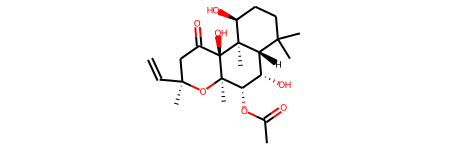

In [1654]:
M1 = mol_list [0]
M1

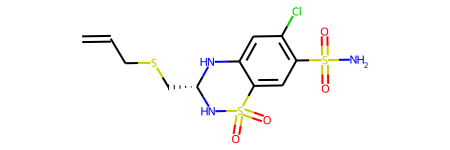

In [1655]:
M2 = mol_list [1]
M2

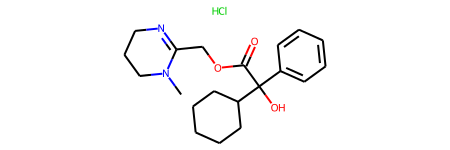

In [1656]:
M3 = mol_list [2]
M3

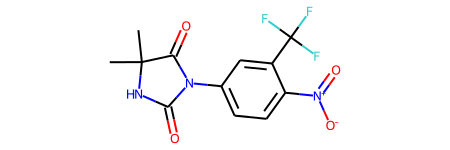

In [1657]:
M4 = mol_list [3]
M4

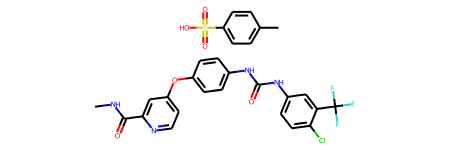

In [1658]:
M5 = mol_list [4]
M5

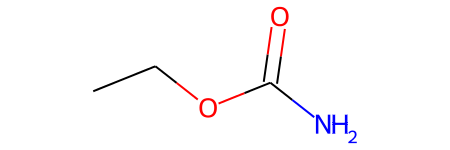

In [1659]:
M6 = mol_list [5]
M6

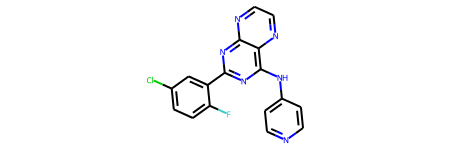

In [1660]:
M7 = mol_list [6]
M7

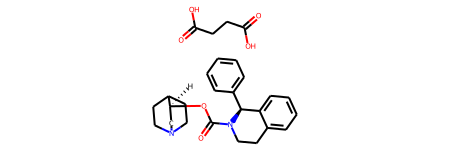

In [1661]:
M8 = mol_list [7]
M8

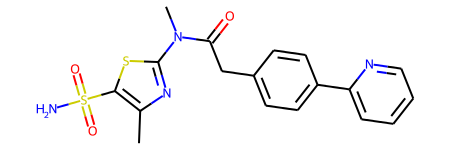

In [1662]:
M9 = mol_list [8]
M9

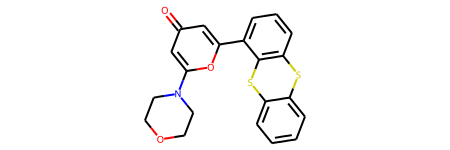

In [1663]:
M10 = mol_list [9]
M10

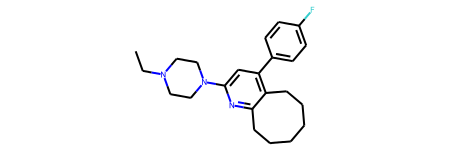

In [1664]:
M11 = mol_list [10]
M11

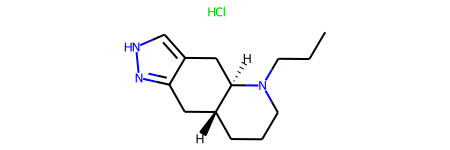

In [1665]:
M12 = mol_list [11]
M12

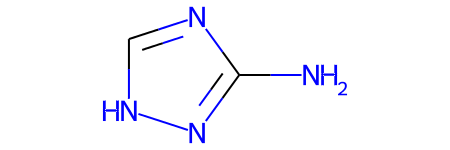

In [1666]:
M13 = mol_list [12]
M13

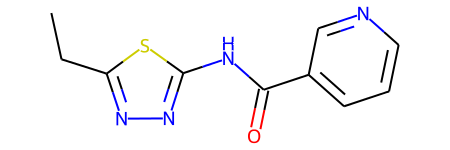

In [1667]:
M14 = mol_list [13]
M14

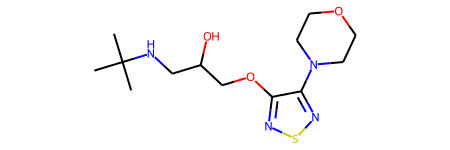

In [1668]:
M15 = mol_list [14]
M15

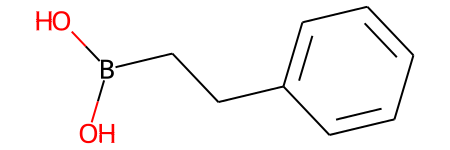

In [1669]:
M16 = mol_list [15]
M16

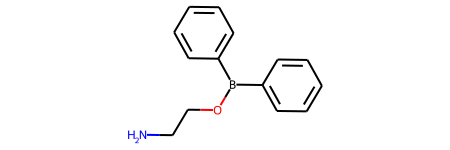

In [1670]:
M17 = mol_list [16]
M17

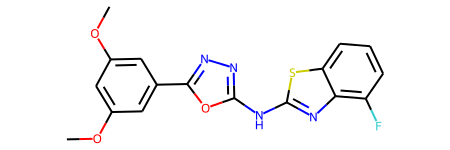

In [1671]:
M18 = mol_list [17]
M18

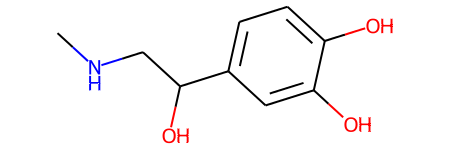

In [1672]:
M19 = mol_list [18]
M19

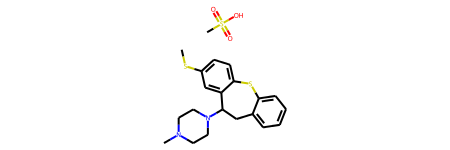

In [1673]:
M20 = mol_list [19]
M20

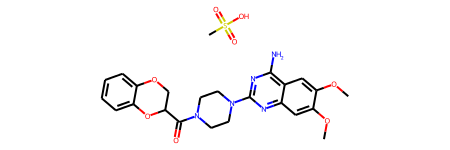

In [1674]:
M21 = mol_list [20]
M21

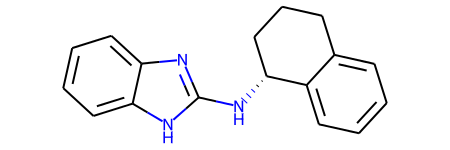

In [1675]:
M22 = mol_list [21]
M22

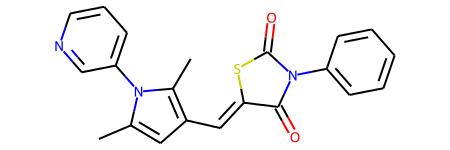

In [1676]:
M23 = mol_list [22]
M23

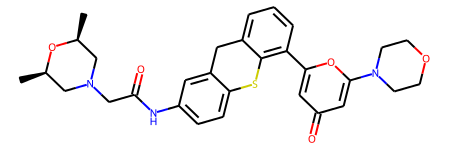

In [1677]:
M24 = mol_list [23]
M24

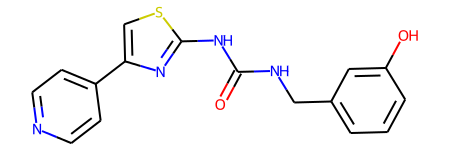

In [1678]:
M25 = mol_list [24]
M25

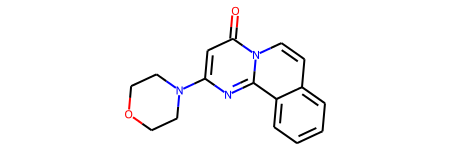

In [1679]:
M26 = mol_list [25]
M26

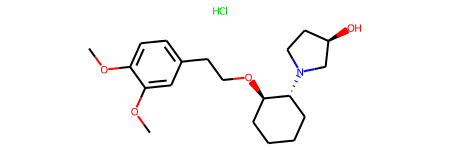

In [1680]:
M27 = mol_list [26]
M27

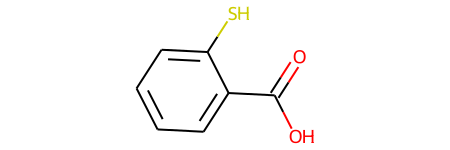

In [1681]:
M28 = mol_list [27]
M28

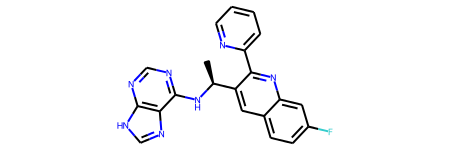

In [1682]:
M29 = mol_list [28]
M29

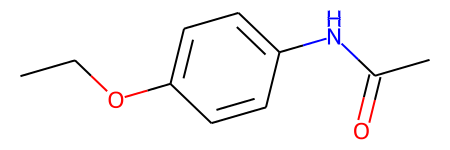

In [1683]:
M30 = mol_list [29]
M30

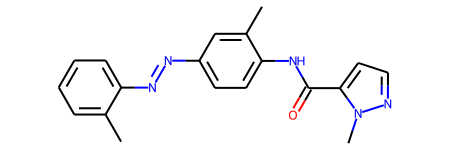

In [1684]:
M31 = mol_list [30]
M31

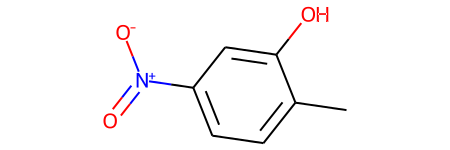

In [1685]:
M32 = mol_list [31]
M32

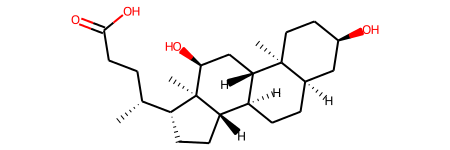

In [1686]:
M33 = mol_list [32]
M33

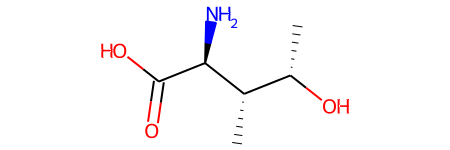

In [1687]:
M34 = mol_list [33]
M34

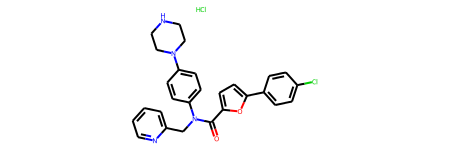

In [1688]:
M35 = mol_list [34]
M35

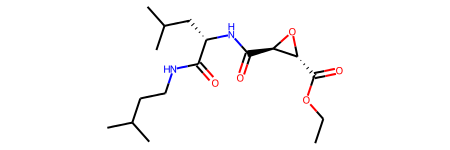

In [1689]:
M36 = mol_list [35]
M36

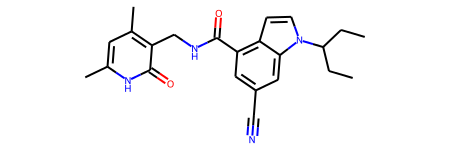

In [1690]:
M37= mol_list [36]
M37

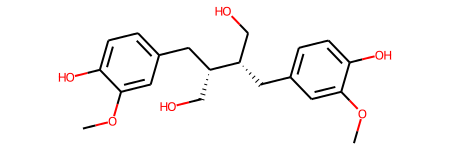

In [1691]:
M38= mol_list [37]
M38

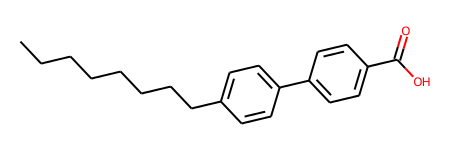

In [1692]:
M39= mol_list [38]
M39

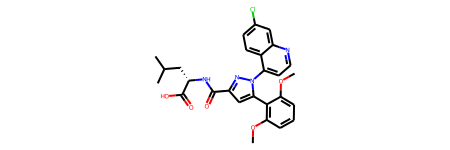

In [1693]:
M40= mol_list [39]
M40

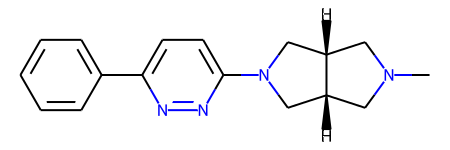

In [1694]:
M41= mol_list [40]
M41

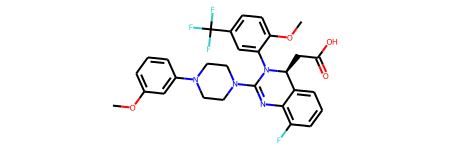

In [1695]:
M42= mol_list [41]
M42

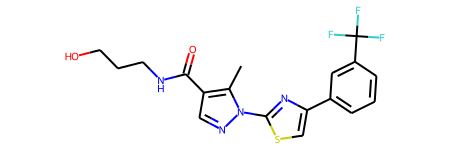

In [1696]:
M43= mol_list [42]
M43

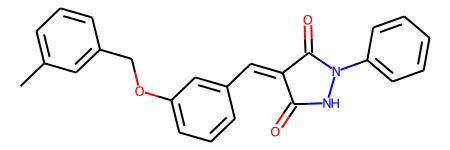

In [1697]:
M44= mol_list [43]
M44

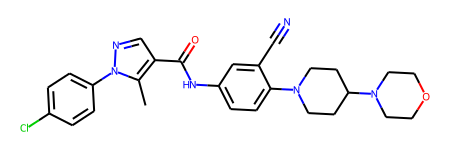

In [1698]:
M45= mol_list [44]
M45

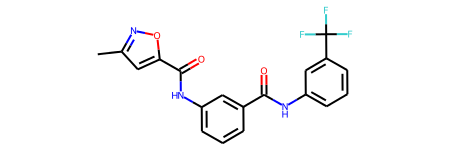

In [1699]:
M46= mol_list [45]
M46

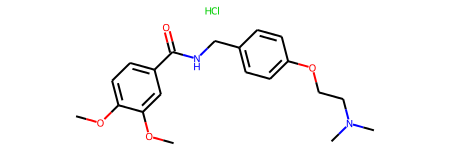

In [1700]:
M47= mol_list [46]
M47

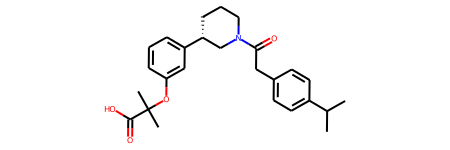

In [1701]:
M48= mol_list [47]
M48

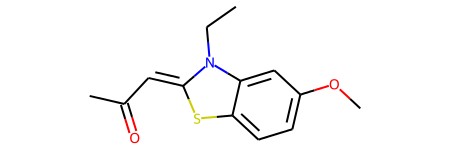

In [1702]:
M49= mol_list [48]
M49

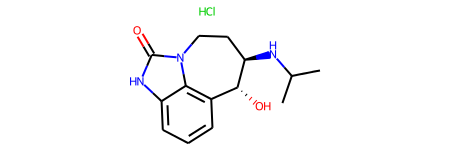

In [1703]:
M50= mol_list [49]
M50

In [1704]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[5,
 6,
 11,
 33,
 36,
 55,
 97,
 102,
 130,
 138,
 144,
 159,
 208,
 233,
 250,
 301,
 314,
 342,
 356,
 463,
 521,
 522,
 527,
 531,
 563,
 621,
 650,
 656,
 694,
 695,
 706,
 725,
 733,
 760,
 768,
 788,
 804,
 807,
 831,
 860,
 890,
 893,
 916,
 919,
 926,
 940,
 946,
 967,
 1017,
 1019]

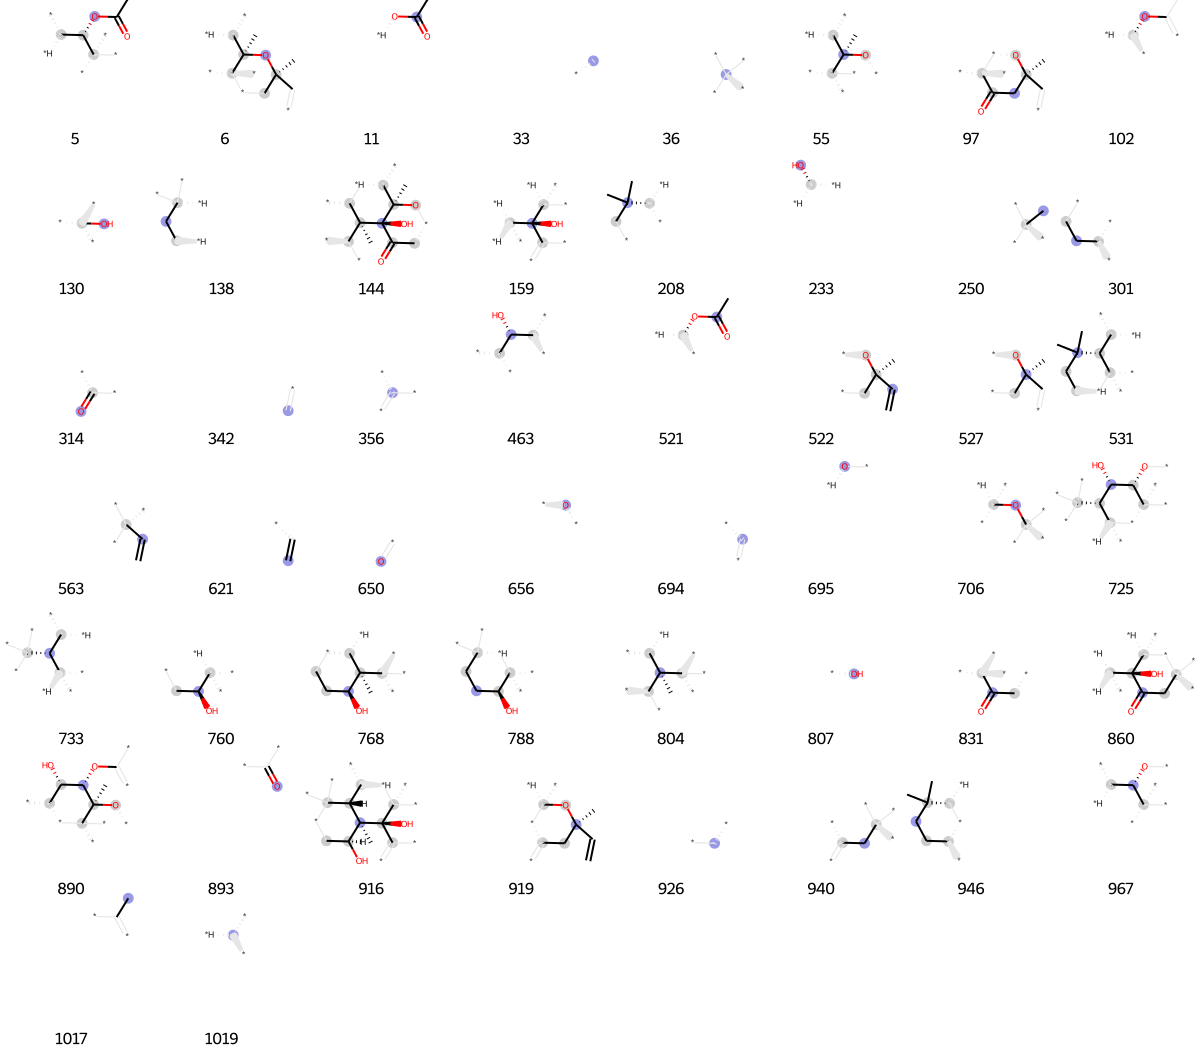

In [1705]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1706]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[67,
 80,
 83,
 90,
 105,
 116,
 147,
 176,
 193,
 207,
 252,
 266,
 301,
 342,
 350,
 356,
 366,
 392,
 452,
 469,
 560,
 561,
 568,
 583,
 607,
 621,
 625,
 634,
 650,
 659,
 691,
 694,
 733,
 802,
 833,
 840,
 849,
 861,
 865,
 875,
 892,
 924,
 940,
 953,
 958,
 985,
 1019]

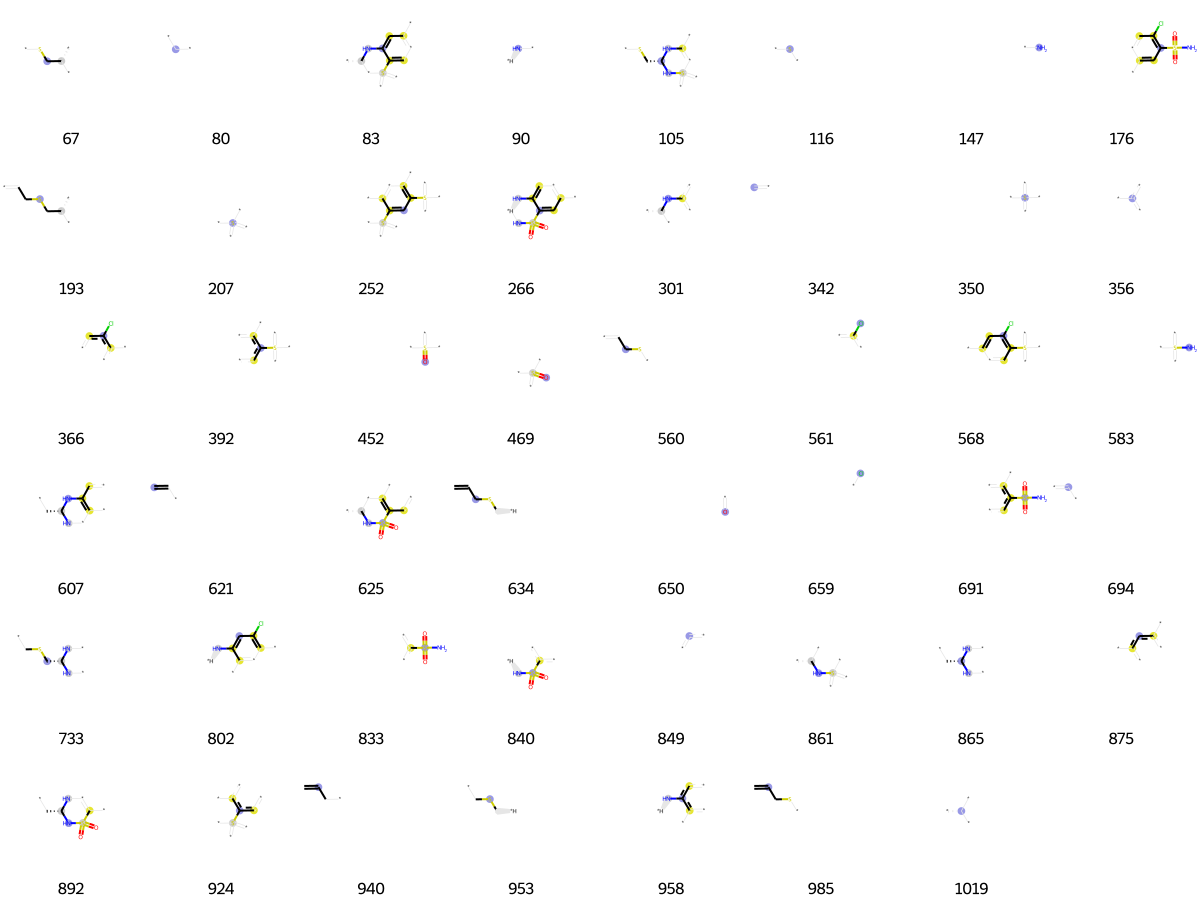

In [1707]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1708]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[2,
 4,
 17,
 33,
 64,
 70,
 72,
 80,
 96,
 114,
 121,
 132,
 147,
 151,
 175,
 220,
 289,
 301,
 313,
 326,
 356,
 378,
 389,
 393,
 456,
 507,
 514,
 566,
 576,
 617,
 650,
 669,
 695,
 726,
 745,
 747,
 799,
 807,
 849,
 865,
 881,
 884,
 890,
 893,
 926,
 935,
 958,
 993,
 1019]

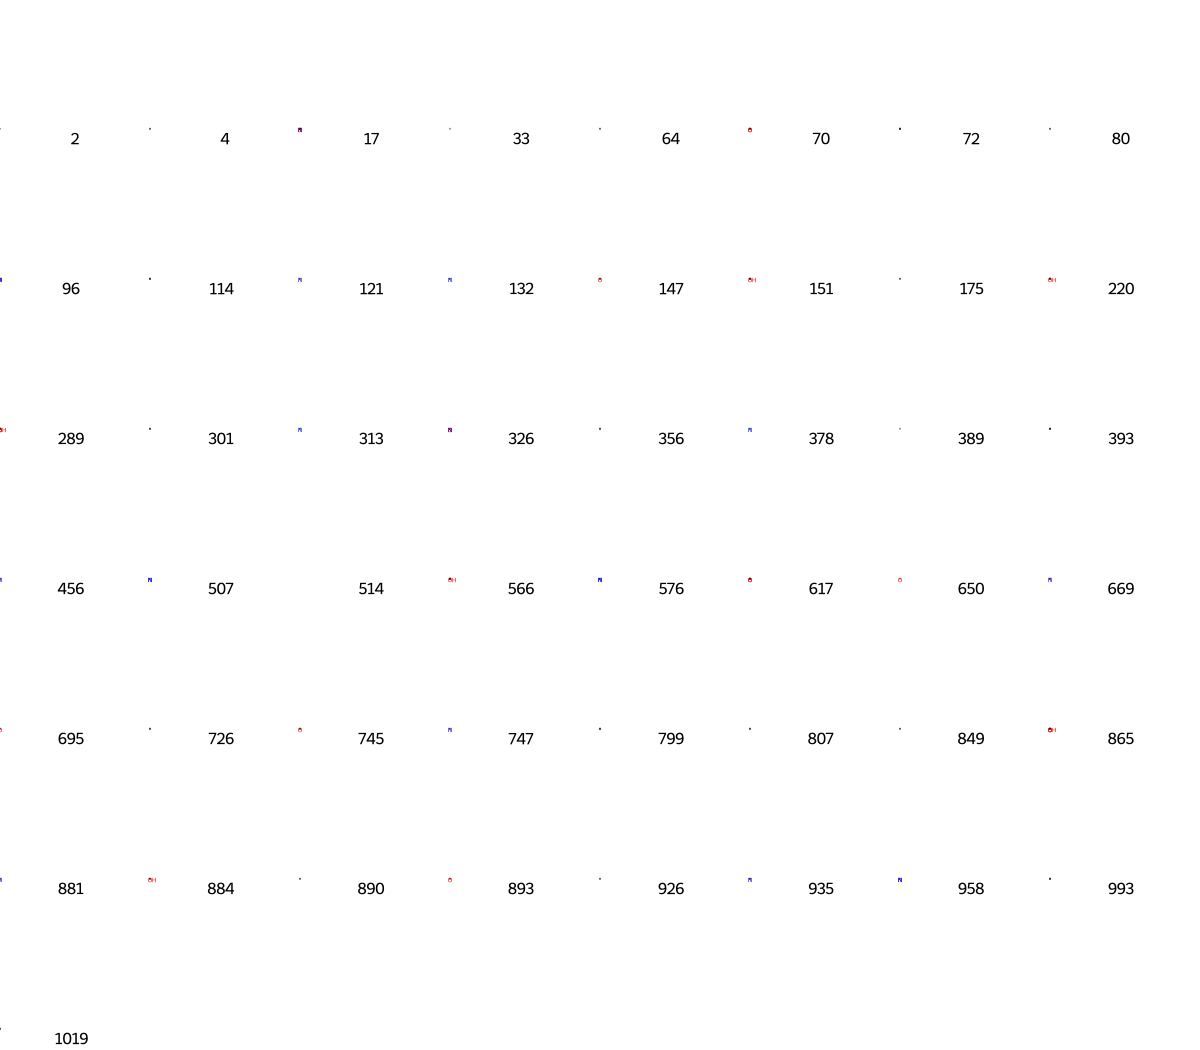

In [1709]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1710]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[19,
 33,
 36,
 90,
 114,
 171,
 228,
 233,
 250,
 255,
 262,
 314,
 324,
 354,
 356,
 419,
 429,
 439,
 489,
 650,
 662,
 715,
 716,
 726,
 735,
 753,
 787,
 801,
 809,
 838,
 849,
 875,
 884,
 904,
 931,
 935,
 939,
 953,
 995,
 1001]

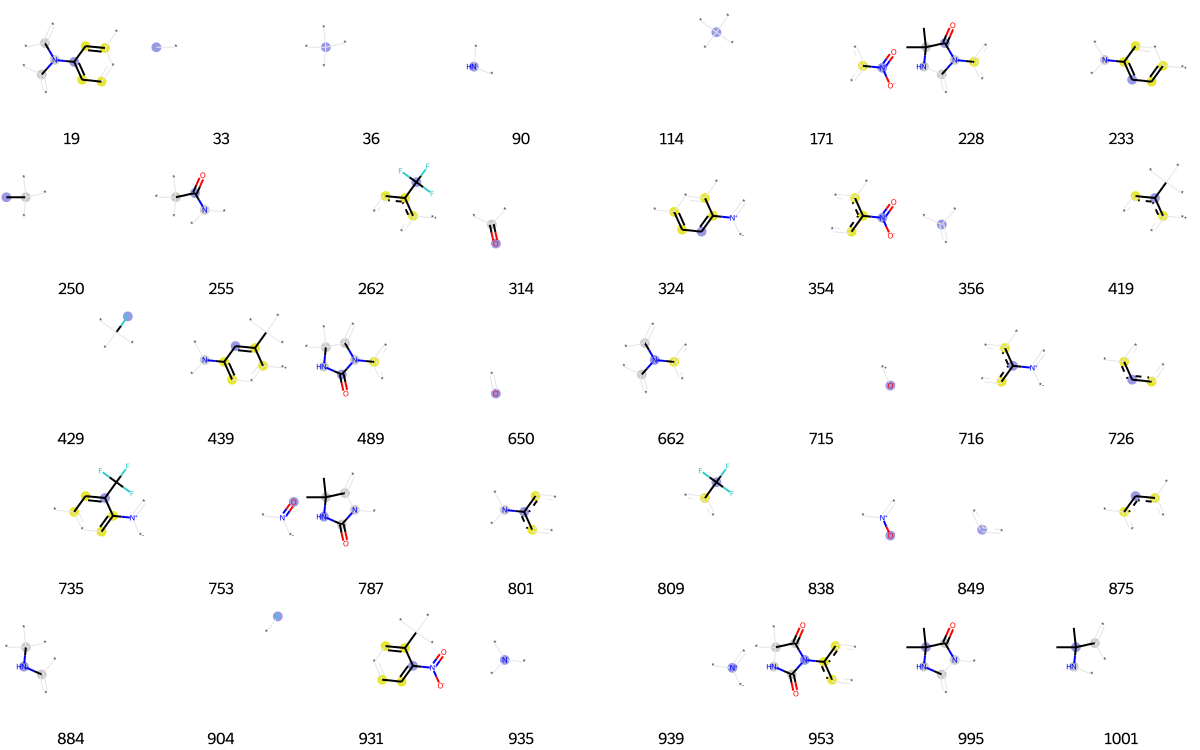

In [1711]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1712]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[9,
 33,
 53,
 56,
 114,
 128,
 153,
 184,
 191,
 193,
 228,
 235,
 262,
 319,
 322,
 345,
 346,
 350,
 356,
 366,
 367,
 378,
 406,
 419,
 428,
 429,
 445,
 452,
 456,
 486,
 552,
 561,
 592,
 593,
 619,
 626,
 645,
 650,
 659,
 666,
 682,
 695,
 698,
 715,
 718,
 726,
 787,
 792,
 799,
 807,
 809,
 842,
 843,
 849,
 855,
 875,
 893,
 896,
 904,
 930,
 965,
 966,
 1019]

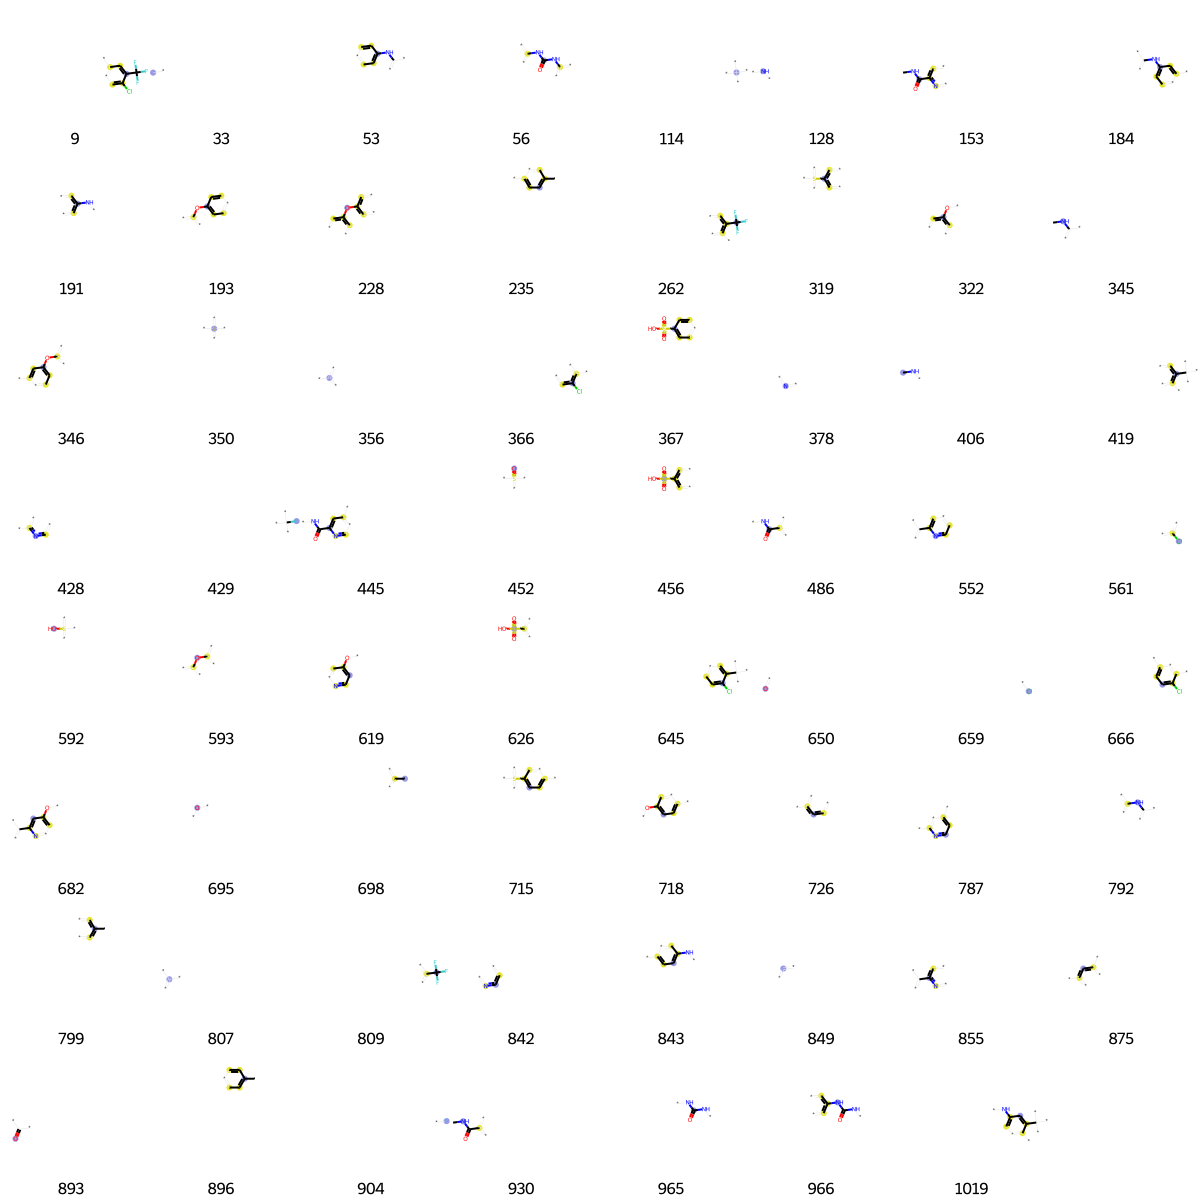

In [1713]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1714]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33, 51, 80, 140, 147, 214, 294, 487, 650, 695, 698, 778, 807, 893]

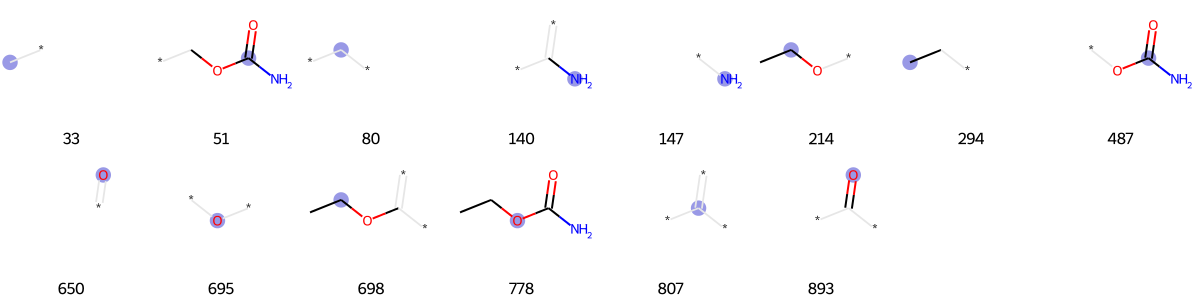

In [1715]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1716]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[27,
 47,
 90,
 97,
 122,
 128,
 160,
 165,
 184,
 191,
 216,
 249,
 279,
 285,
 352,
 356,
 361,
 378,
 383,
 428,
 451,
 491,
 500,
 561,
 579,
 600,
 659,
 699,
 700,
 708,
 726,
 728,
 816,
 831,
 842,
 843,
 849,
 875,
 888,
 904,
 915]

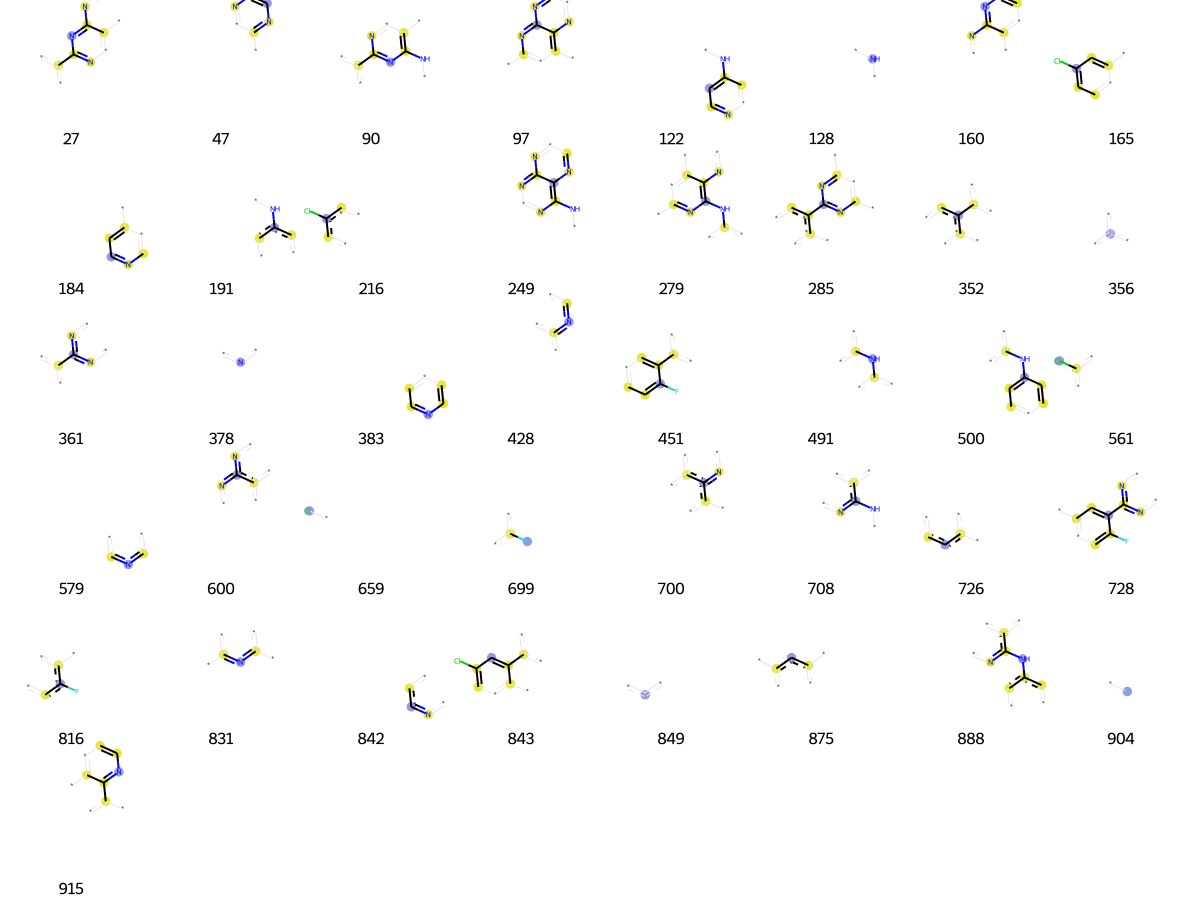

In [1717]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1718]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[3,
 41,
 54,
 64,
 80,
 102,
 115,
 117,
 175,
 191,
 212,
 232,
 242,
 255,
 263,
 301,
 356,
 371,
 389,
 403,
 410,
 421,
 449,
 456,
 488,
 540,
 549,
 585,
 609,
 610,
 639,
 650,
 651,
 684,
 695,
 713,
 714,
 726,
 729,
 739,
 798,
 807,
 849,
 864,
 893,
 915,
 926,
 935,
 941,
 1019]

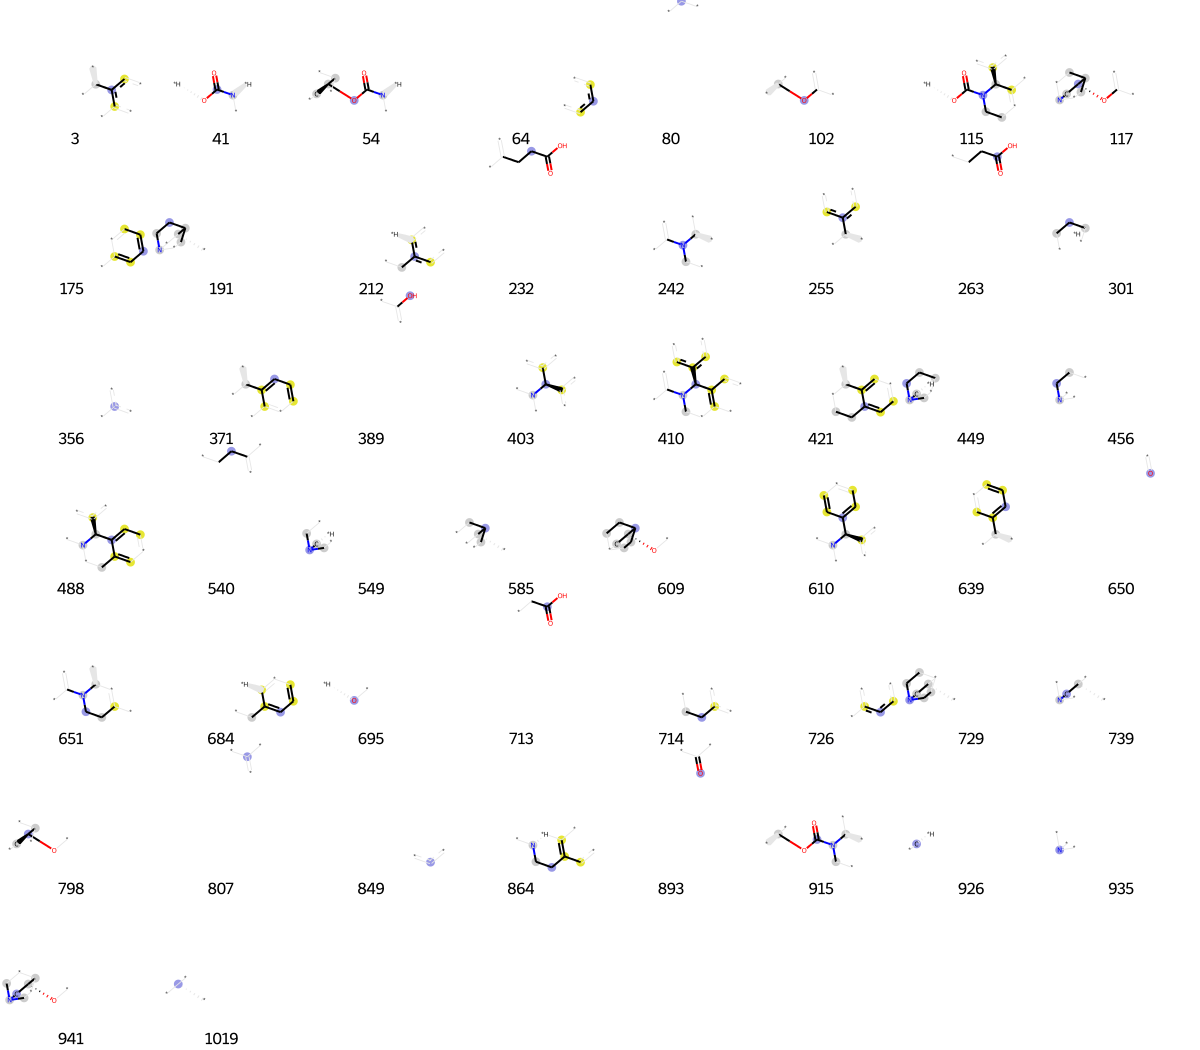

In [1719]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1720]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 54,
 64,
 80,
 92,
 131,
 136,
 139,
 147,
 162,
 175,
 214,
 304,
 310,
 318,
 325,
 339,
 350,
 356,
 373,
 378,
 428,
 448,
 452,
 554,
 560,
 583,
 650,
 675,
 698,
 715,
 726,
 730,
 807,
 819,
 820,
 827,
 831,
 833,
 842,
 849,
 881,
 893,
 896,
 913,
 947,
 961,
 964,
 980,
 989]

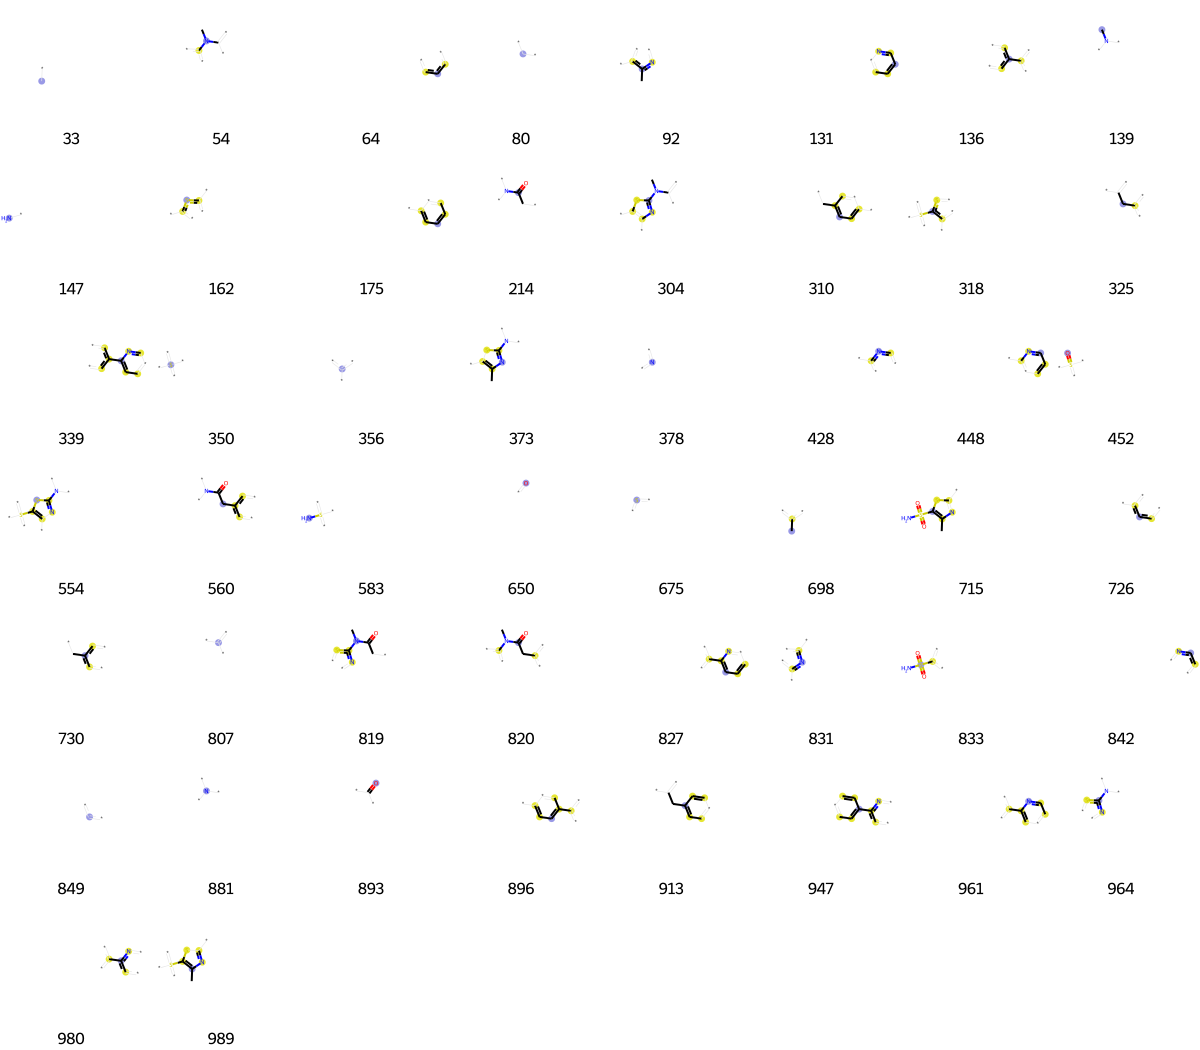

In [1721]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1722]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[15,
 52,
 64,
 121,
 175,
 314,
 326,
 352,
 356,
 381,
 397,
 407,
 417,
 418,
 456,
 498,
 523,
 561,
 580,
 604,
 644,
 650,
 654,
 656,
 675,
 700,
 711,
 726,
 760,
 849,
 875,
 878,
 926,
 935,
 946,
 947,
 949,
 950,
 954,
 978,
 984,
 1014,
 1020]

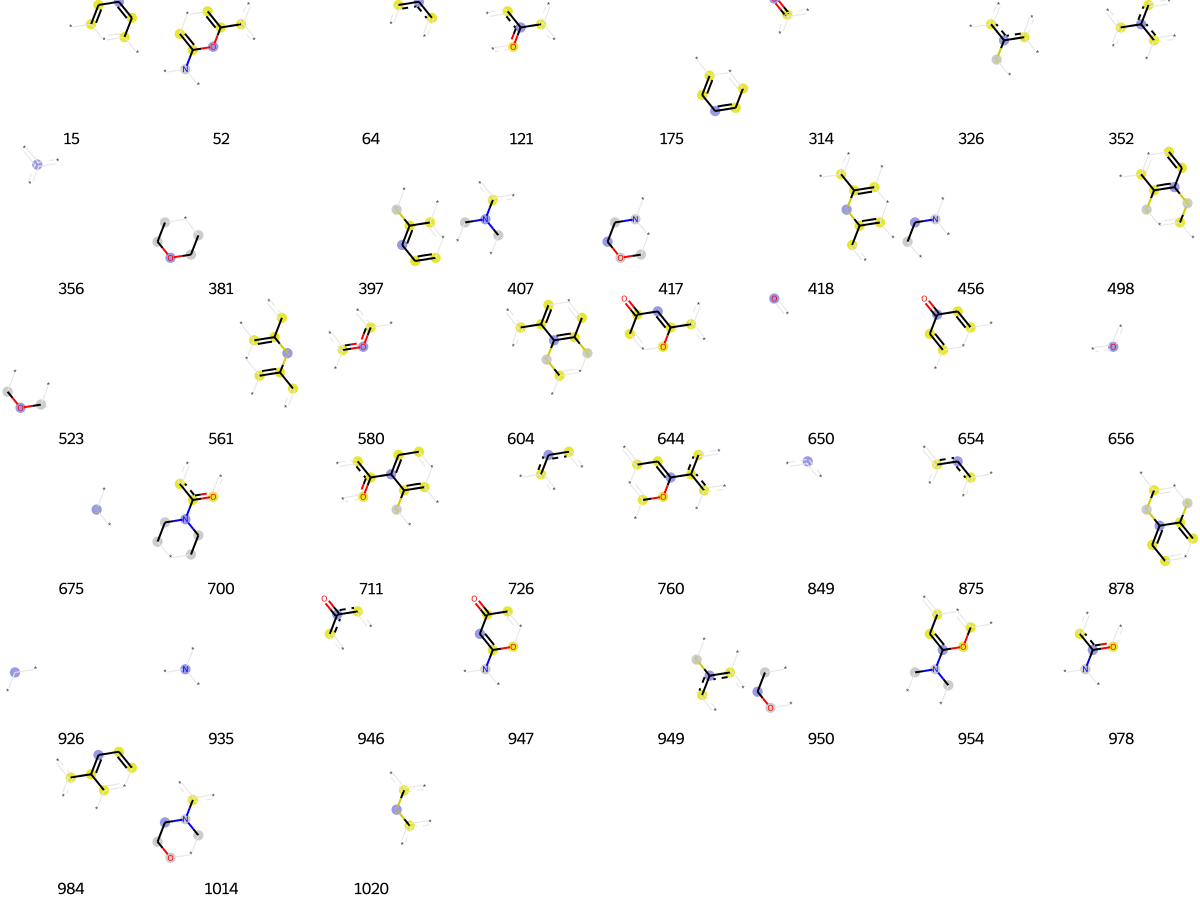

In [1723]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1724]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[2,
 4,
 32,
 33,
 34,
 74,
 80,
 90,
 136,
 151,
 222,
 276,
 280,
 293,
 294,
 310,
 352,
 356,
 361,
 367,
 378,
 386,
 407,
 432,
 456,
 484,
 507,
 527,
 569,
 646,
 699,
 714,
 726,
 767,
 831,
 849,
 865,
 875,
 896,
 904,
 924,
 926,
 935,
 969]

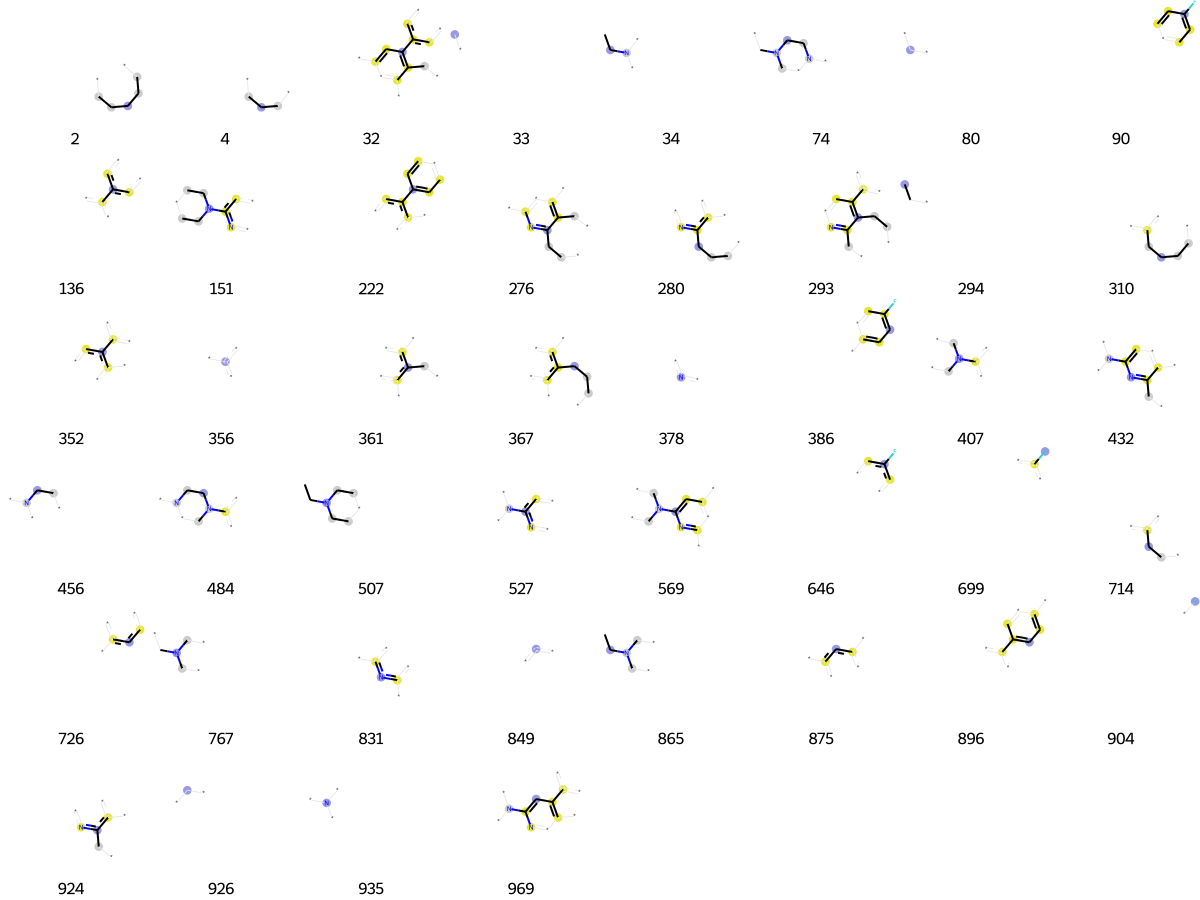

In [1725]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1726]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[4,
 33,
 80,
 90,
 121,
 177,
 212,
 231,
 276,
 285,
 294,
 301,
 356,
 378,
 446,
 456,
 482,
 514,
 560,
 580,
 585,
 623,
 639,
 665,
 690,
 695,
 779,
 794,
 820,
 849,
 855,
 876,
 924,
 926,
 935,
 980,
 998,
 1019]

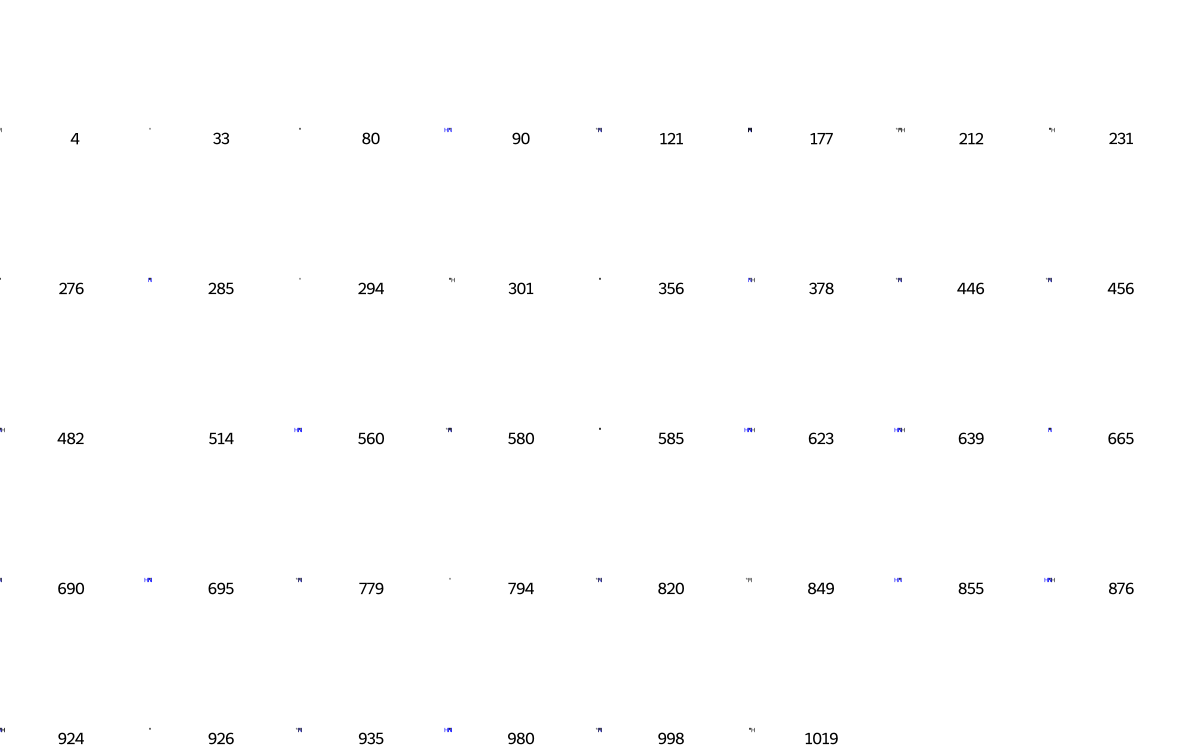

In [1727]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1728]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[90, 147, 356, 378, 409, 411, 428, 433, 695, 713, 770, 786, 814, 849, 913, 980]

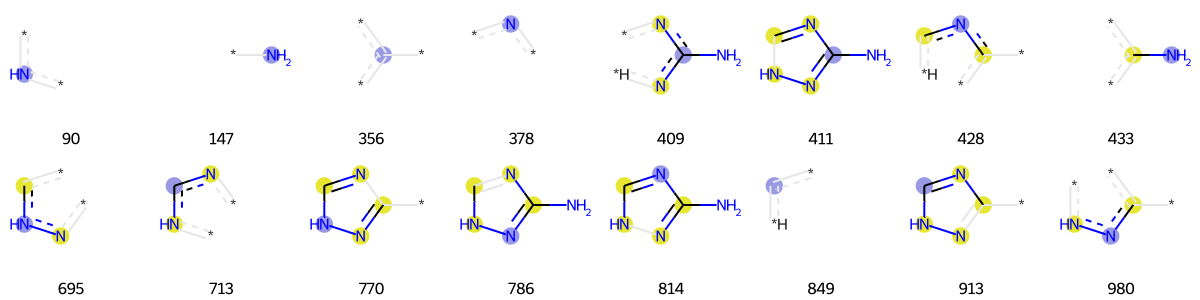

In [1729]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1730]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[19,
 32,
 33,
 64,
 80,
 128,
 140,
 162,
 251,
 294,
 356,
 361,
 378,
 385,
 426,
 437,
 486,
 511,
 536,
 554,
 562,
 579,
 624,
 650,
 675,
 683,
 726,
 734,
 771,
 775,
 792,
 807,
 828,
 842,
 849,
 893,
 938,
 961]

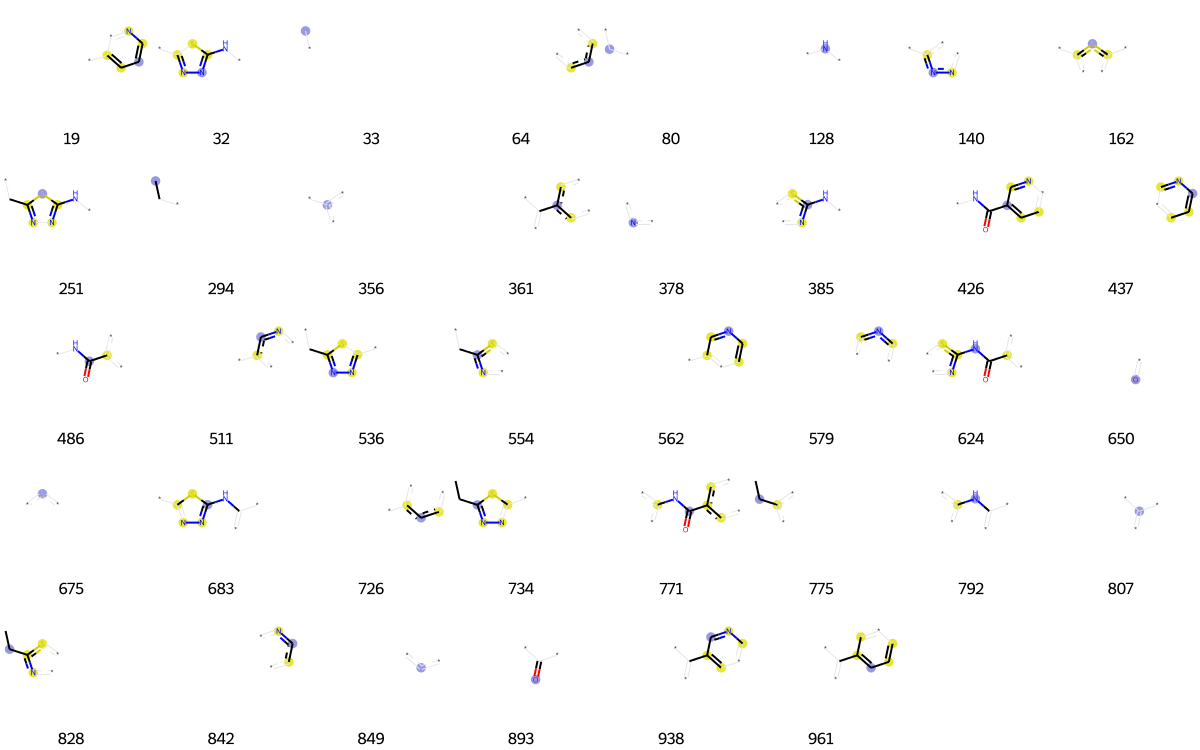

In [1731]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1732]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 33,
 64,
 80,
 89,
 105,
 114,
 118,
 122,
 128,
 130,
 201,
 227,
 255,
 356,
 378,
 381,
 392,
 401,
 407,
 417,
 428,
 430,
 448,
 456,
 523,
 554,
 576,
 603,
 606,
 616,
 628,
 656,
 658,
 675,
 684,
 695,
 807,
 843,
 926,
 935,
 950,
 1014]

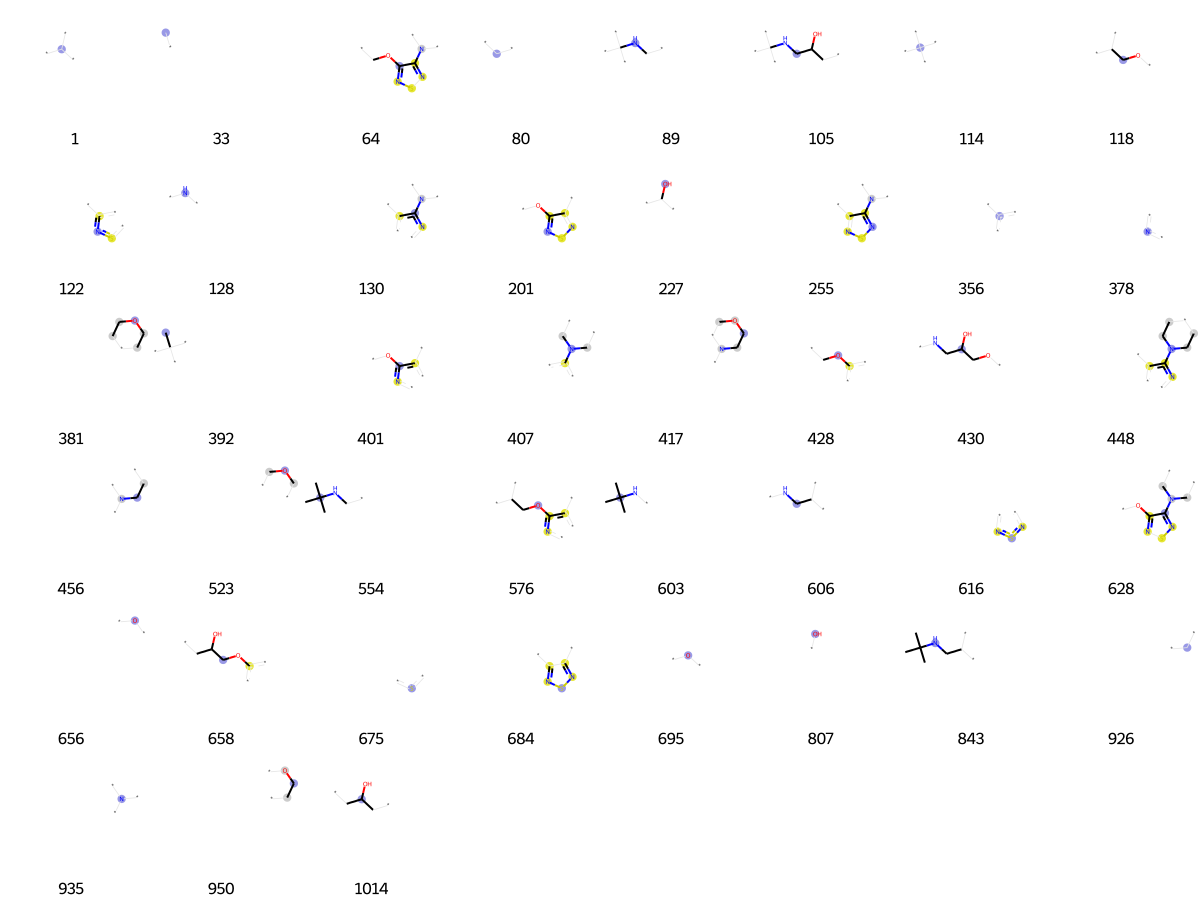

In [1733]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1734]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[21,
 42,
 64,
 80,
 175,
 198,
 219,
 271,
 295,
 338,
 356,
 384,
 389,
 541,
 634,
 726,
 730,
 807,
 849]

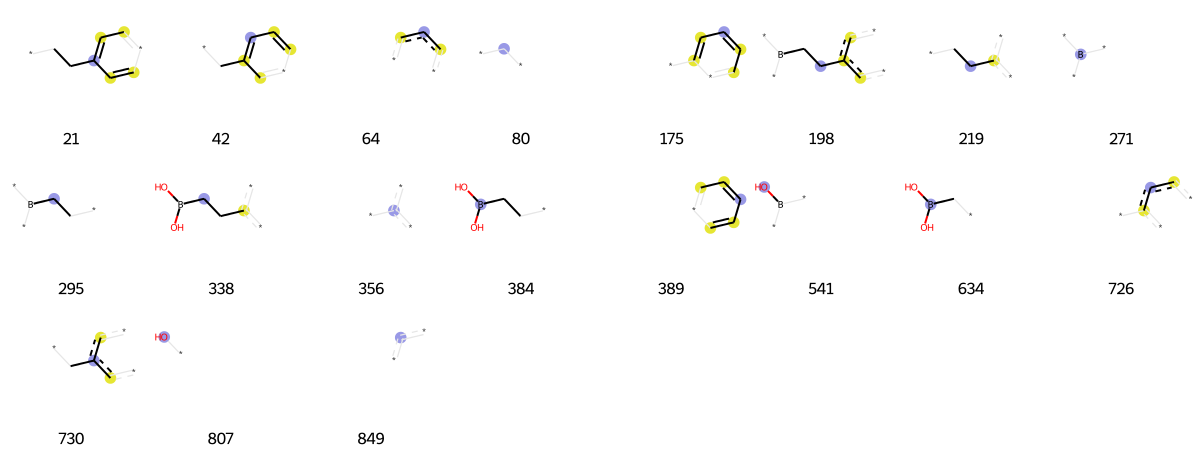

In [1735]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1736]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[13,
 64,
 80,
 147,
 175,
 271,
 356,
 389,
 436,
 575,
 635,
 695,
 726,
 734,
 769,
 777,
 782,
 801,
 816,
 831,
 849,
 981]

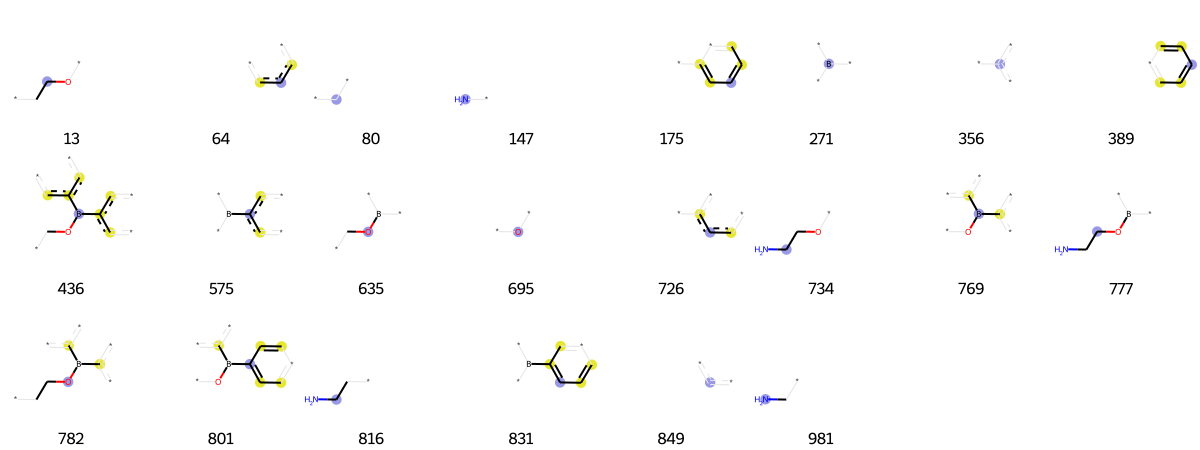

In [1737]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1738]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[7,
 8,
 15,
 23,
 33,
 64,
 71,
 87,
 99,
 128,
 136,
 140,
 141,
 156,
 162,
 187,
 192,
 194,
 264,
 322,
 356,
 360,
 376,
 378,
 385,
 461,
 491,
 512,
 516,
 580,
 656,
 663,
 664,
 675,
 695,
 699,
 700,
 726,
 753,
 780,
 781,
 816,
 831,
 841,
 849,
 875,
 885,
 904]

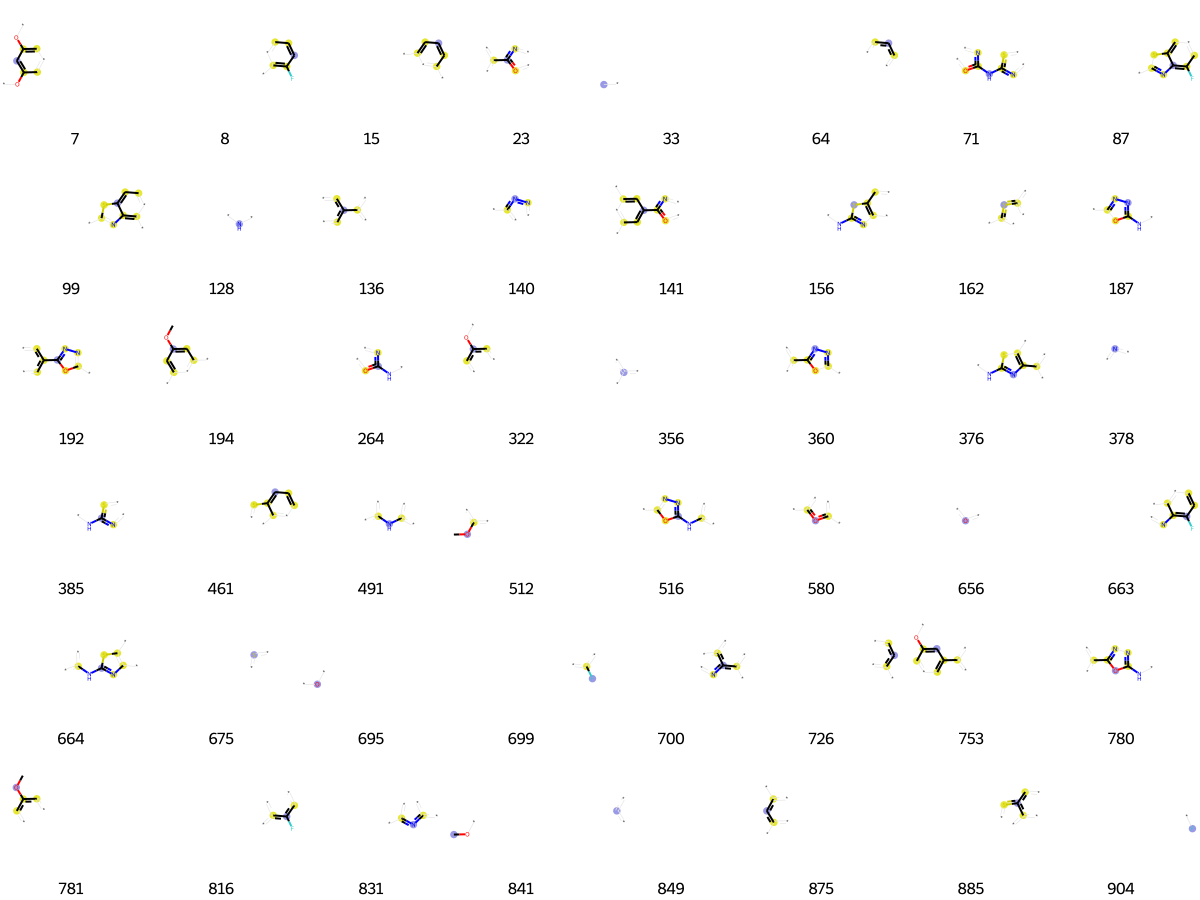

In [1739]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1740]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 33,
 80,
 128,
 227,
 315,
 338,
 341,
 343,
 356,
 406,
 410,
 451,
 578,
 583,
 589,
 606,
 632,
 726,
 760,
 807,
 829,
 844,
 849,
 875,
 971]

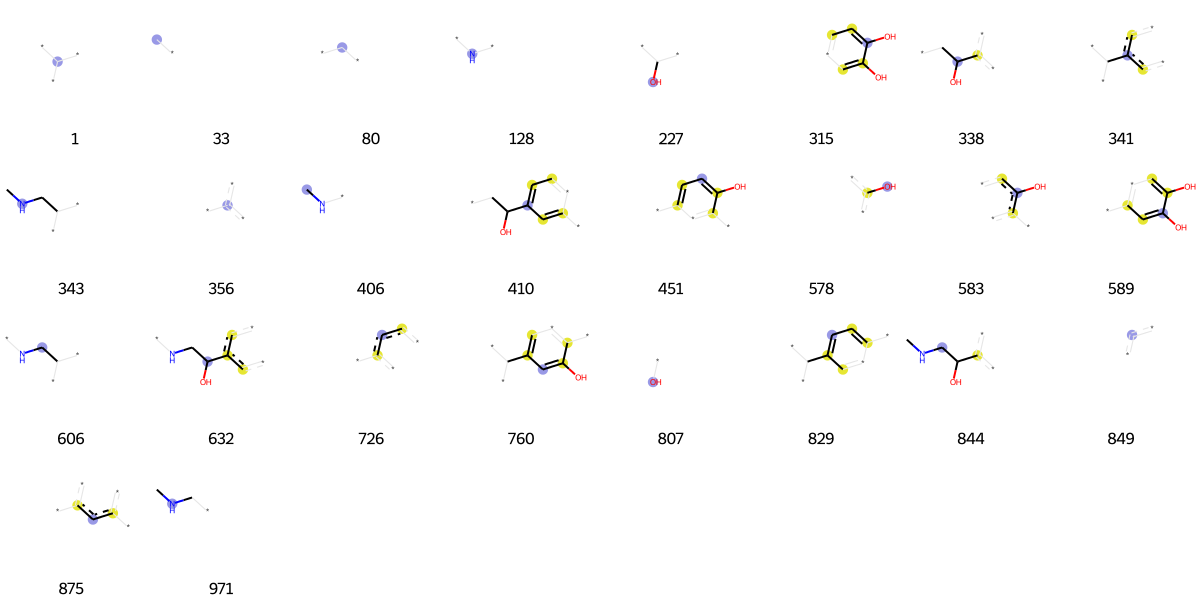

In [1741]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1742]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[3,
 14,
 33,
 44,
 64,
 116,
 121,
 128,
 129,
 175,
 201,
 207,
 212,
 231,
 288,
 350,
 356,
 375,
 381,
 394,
 397,
 452,
 456,
 489,
 533,
 561,
 592,
 650,
 675,
 684,
 692,
 699,
 711,
 712,
 726,
 744,
 807,
 811,
 830,
 849,
 875,
 926,
 935,
 949,
 980,
 1019,
 1020]

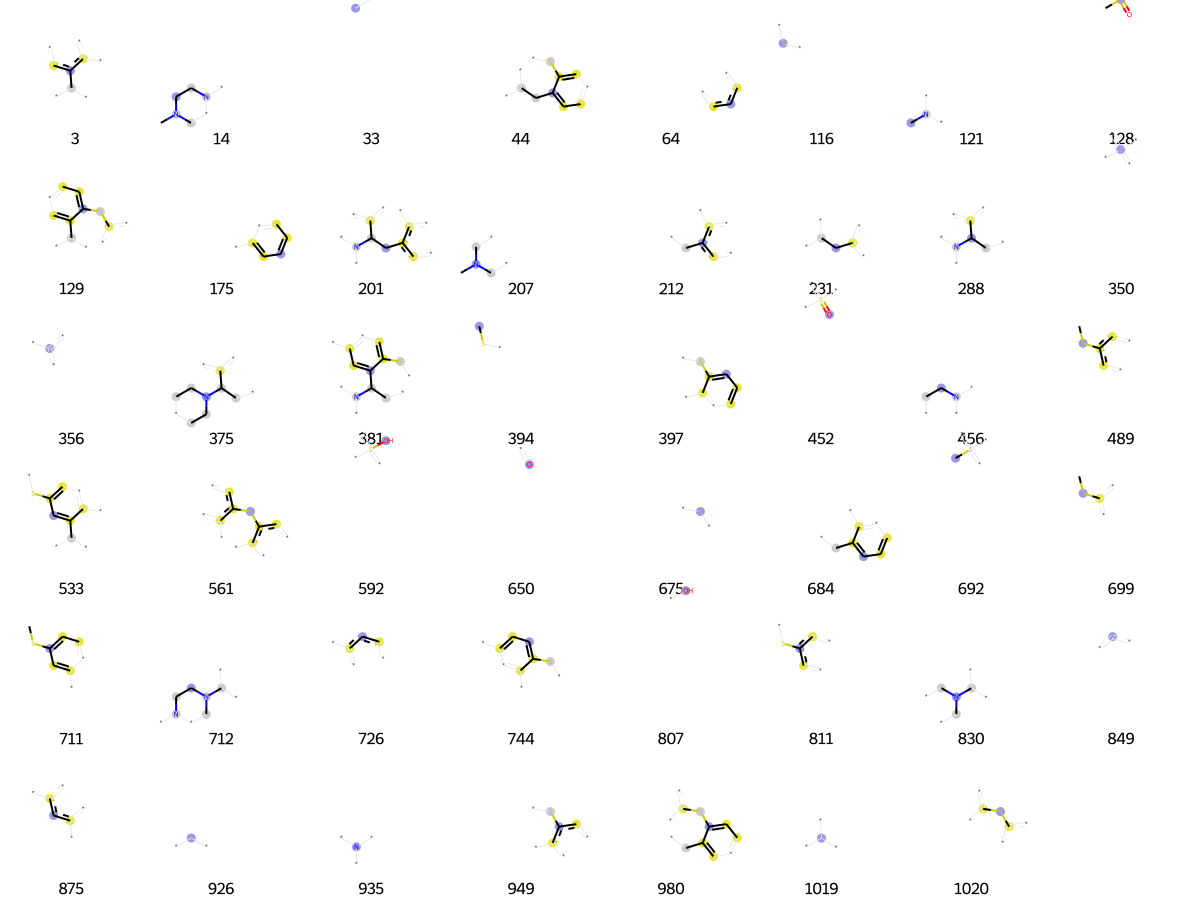

In [1743]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1744]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 64,
 66,
 73,
 82,
 128,
 147,
 175,
 212,
 221,
 232,
 237,
 246,
 249,
 333,
 335,
 348,
 350,
 351,
 356,
 378,
 407,
 433,
 435,
 441,
 452,
 456,
 457,
 469,
 484,
 511,
 512,
 565,
 588,
 592,
 623,
 624,
 644,
 650,
 656,
 692,
 695,
 726,
 750,
 778,
 780,
 807,
 831,
 841,
 849,
 860,
 873,
 875,
 881,
 891,
 893,
 899,
 926,
 935,
 946,
 985,
 1019]

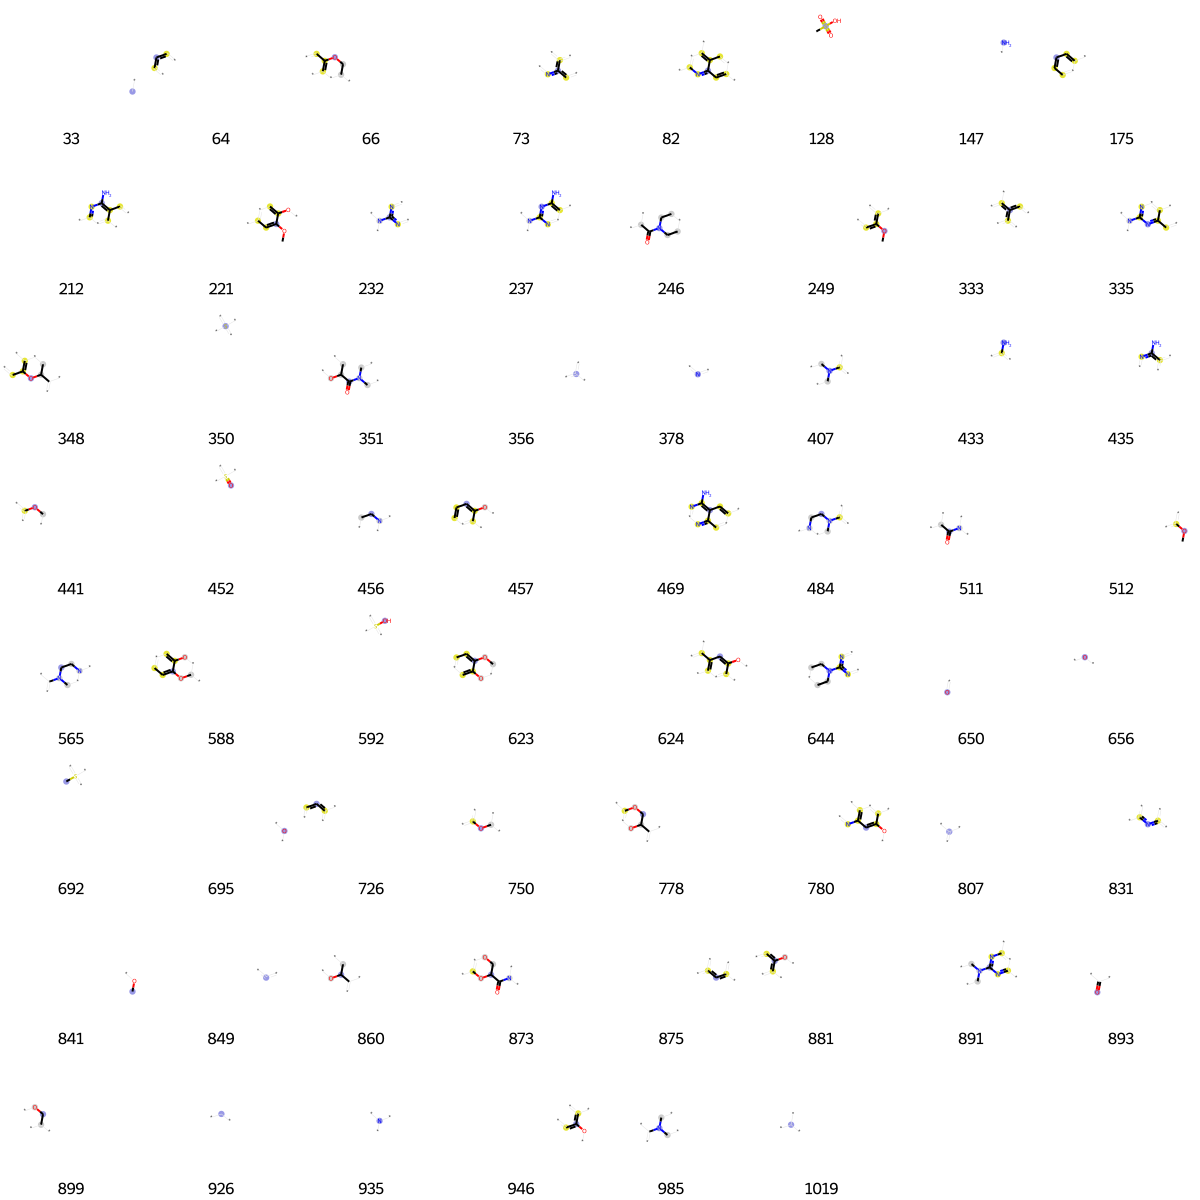

In [1745]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1746]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[3,
 4,
 25,
 64,
 73,
 90,
 119,
 128,
 175,
 212,
 214,
 289,
 301,
 343,
 356,
 371,
 378,
 421,
 473,
 535,
 556,
 565,
 684,
 685,
 714,
 721,
 726,
 759,
 790,
 831,
 849,
 926,
 931,
 974,
 976,
 1011,
 1019,
 1020]

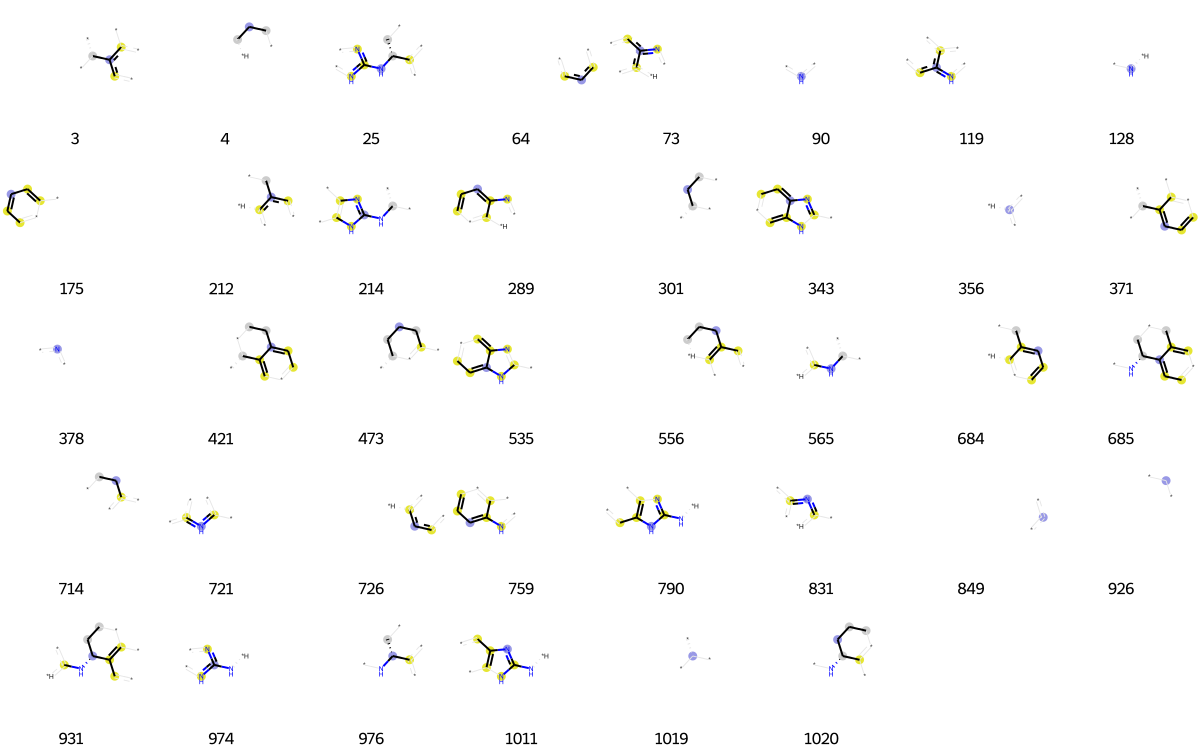

In [1747]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1748]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[19,
 25,
 31,
 33,
 64,
 152,
 156,
 175,
 273,
 281,
 290,
 314,
 332,
 335,
 356,
 378,
 389,
 437,
 480,
 511,
 562,
 579,
 620,
 650,
 662,
 667,
 675,
 694,
 698,
 703,
 726,
 742,
 769,
 801,
 842,
 849,
 863,
 875,
 878,
 879,
 883,
 935,
 961,
 969,
 1003,
 1018,
 1020]

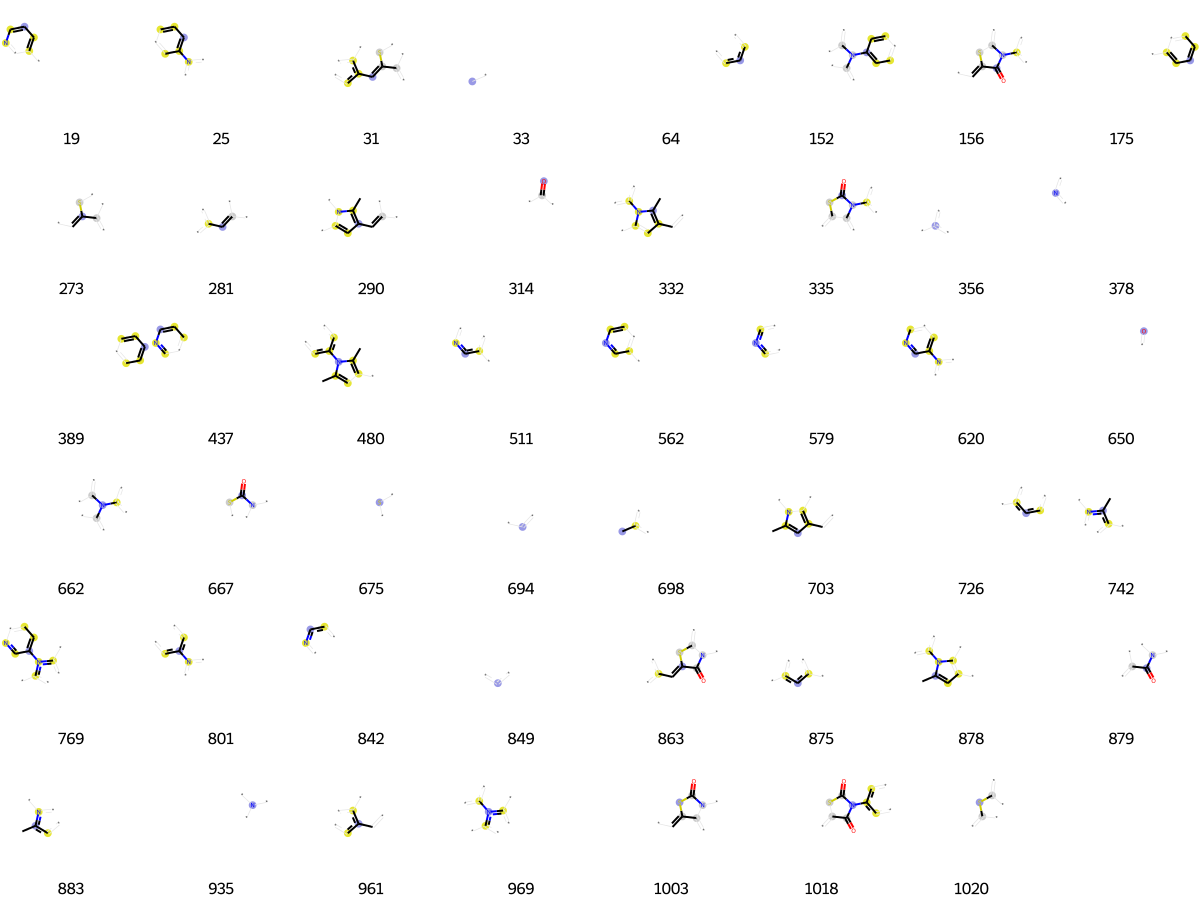

In [1749]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1750]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[15,
 33,
 41,
 52,
 64,
 71,
 80,
 121,
 128,
 135,
 147,
 184,
 191,
 206,
 212,
 258,
 260,
 285,
 288,
 314,
 326,
 352,
 356,
 372,
 381,
 383,
 407,
 417,
 418,
 456,
 523,
 540,
 580,
 644,
 650,
 654,
 656,
 675,
 684,
 700,
 711,
 726,
 739,
 744,
 760,
 765,
 767,
 792,
 807,
 843,
 849,
 875,
 893,
 896,
 897,
 901,
 926,
 935,
 946,
 947,
 949,
 950,
 954,
 965,
 978,
 980,
 984,
 1014,
 1019,
 1020]

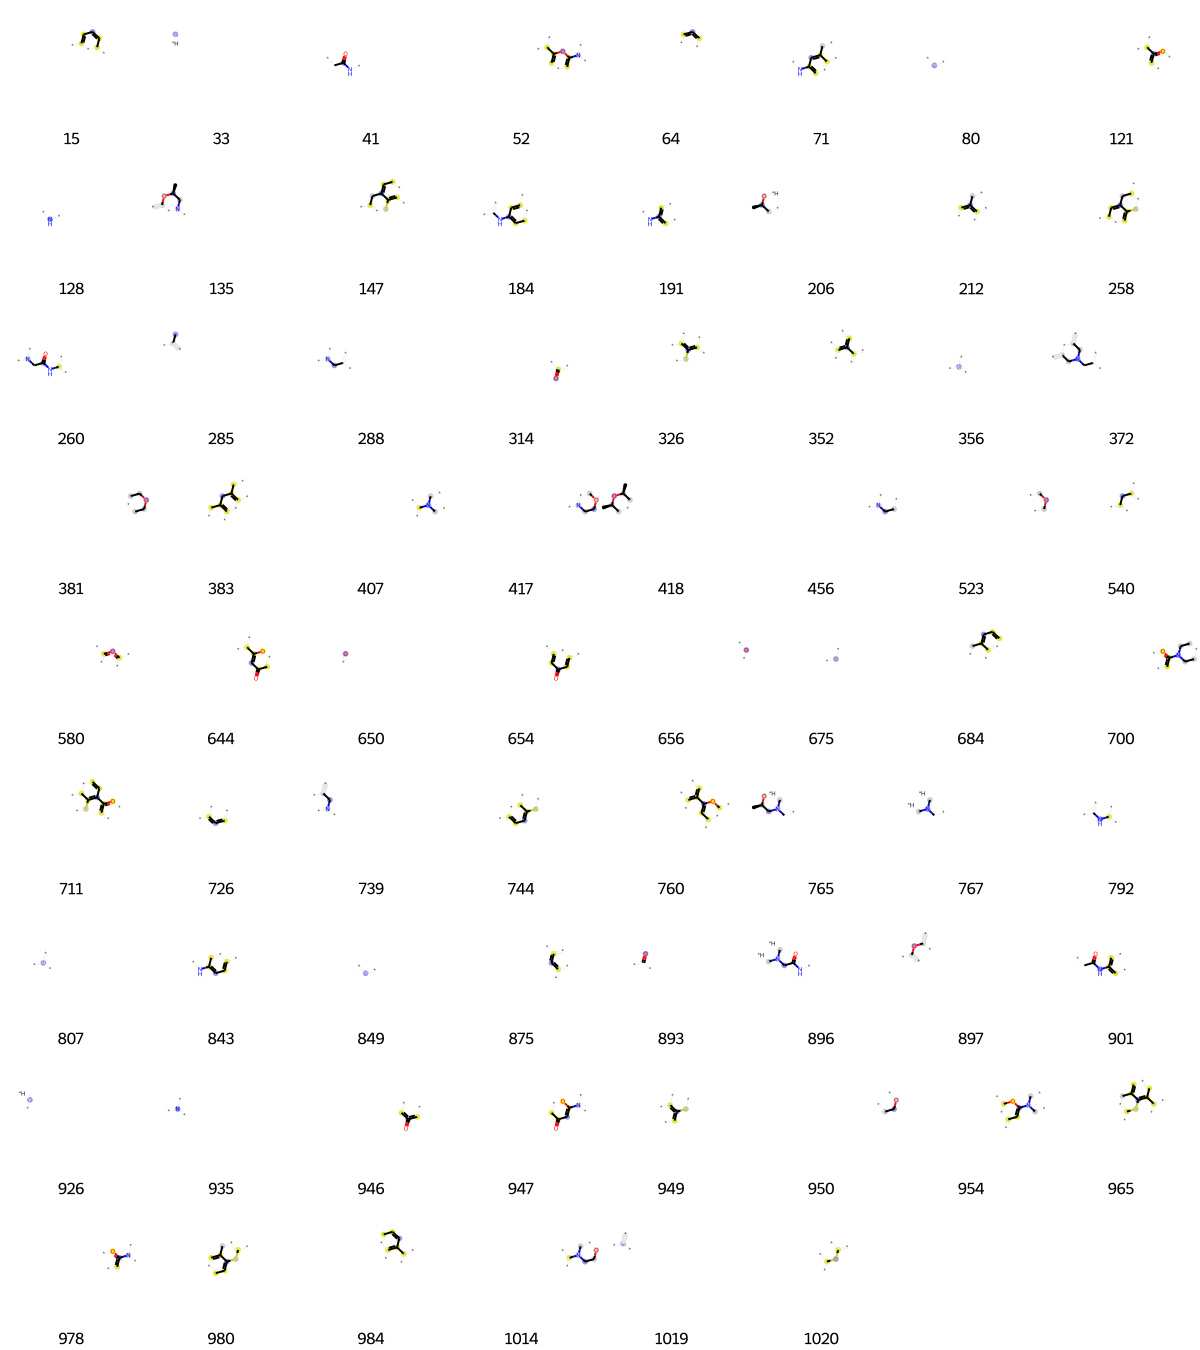

In [1751]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1752]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[15,
 36,
 42,
 64,
 65,
 80,
 117,
 128,
 136,
 184,
 190,
 197,
 240,
 242,
 255,
 312,
 356,
 376,
 378,
 381,
 383,
 385,
 543,
 549,
 552,
 578,
 579,
 650,
 675,
 702,
 726,
 730,
 745,
 755,
 792,
 807,
 831,
 842,
 849,
 875,
 893,
 912,
 947,
 965,
 980]

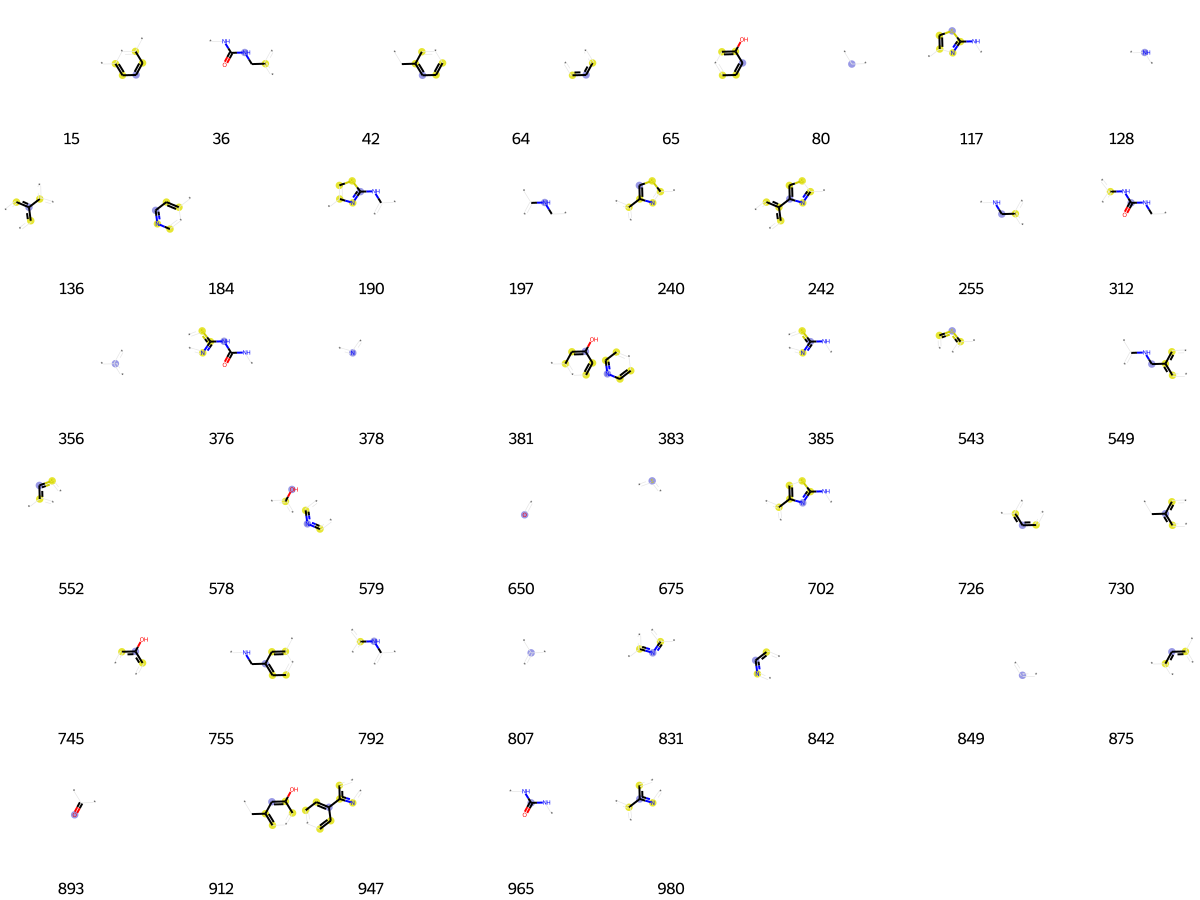

In [1753]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1754]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[63,
 64,
 77,
 80,
 117,
 129,
 151,
 169,
 175,
 198,
 245,
 314,
 333,
 356,
 378,
 381,
 407,
 417,
 456,
 523,
 527,
 549,
 559,
 569,
 650,
 653,
 656,
 672,
 726,
 761,
 831,
 849,
 875,
 926,
 935,
 945,
 950,
 1004,
 1014]

In [1755]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[3,
 4,
 13,
 33,
 77,
 80,
 94,
 104,
 140,
 219,
 221,
 233,
 247,
 249,
 301,
 310,
 334,
 356,
 433,
 456,
 512,
 514,
 590,
 593,
 665,
 695,
 726,
 730,
 735,
 739,
 744,
 798,
 807,
 817,
 823,
 830,
 841,
 849,
 869,
 875,
 890,
 926,
 935,
 946,
 986,
 999,
 1019]

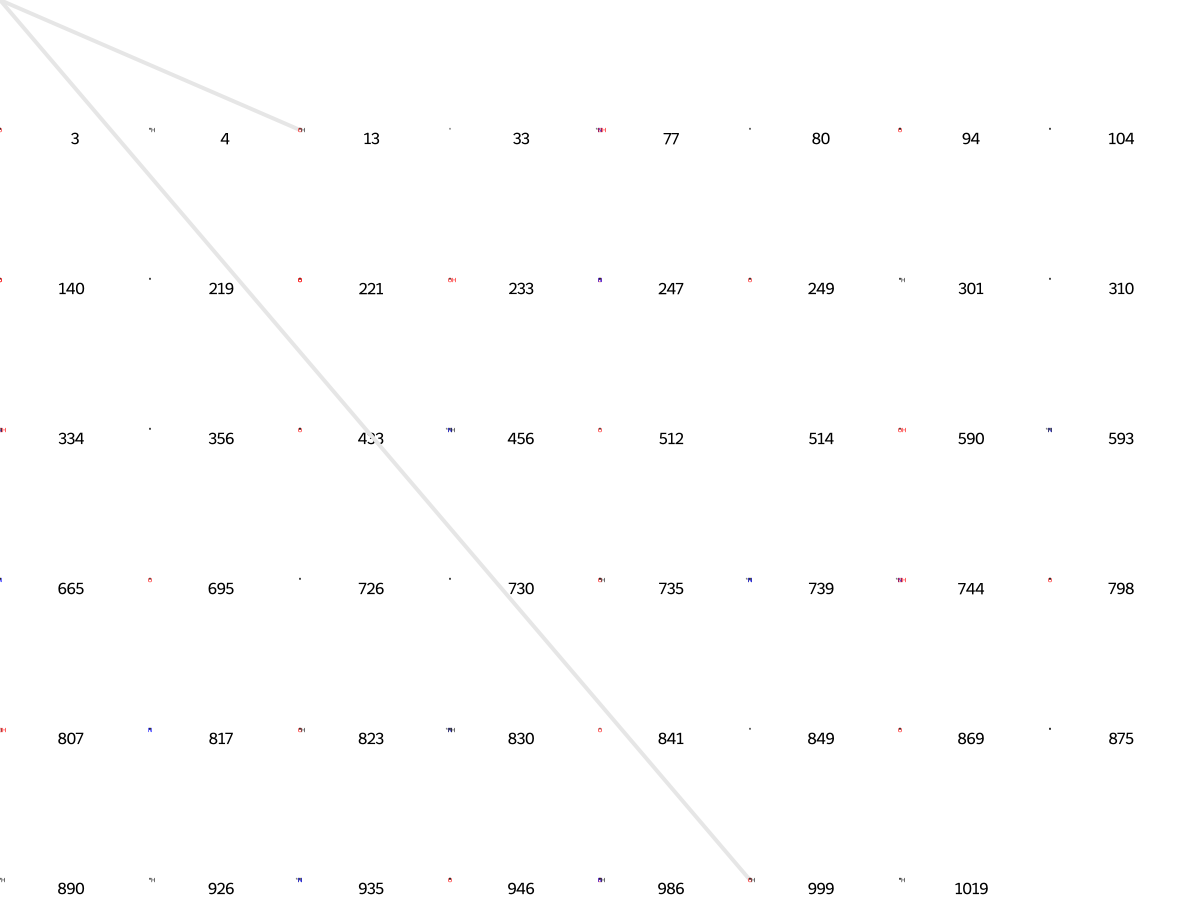

In [1756]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1757]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 23,
 64,
 175,
 229,
 356,
 389,
 423,
 456,
 650,
 717,
 726,
 783,
 807,
 809,
 849,
 893,
 933,
 967]

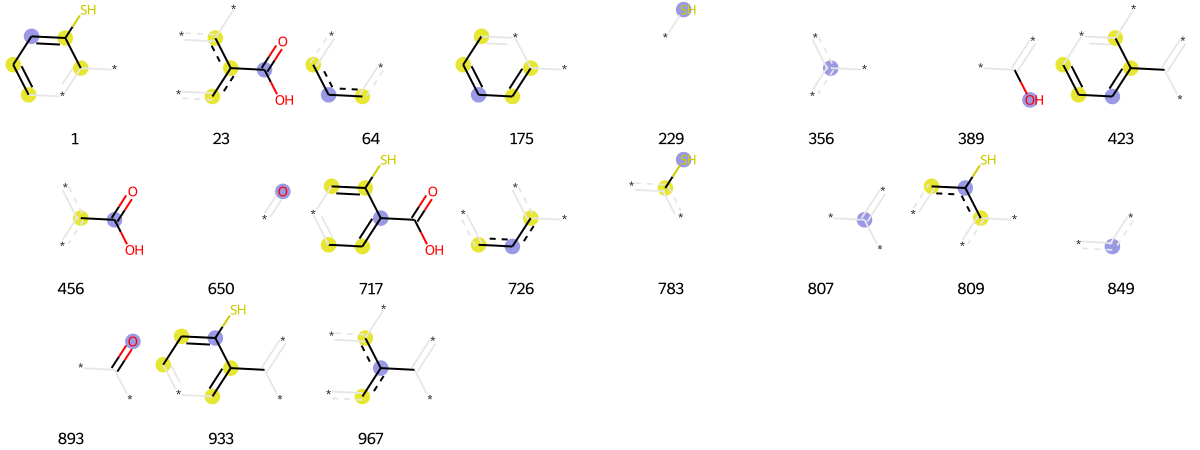

In [1758]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1759]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 64,
 66,
 72,
 73,
 90,
 106,
 122,
 128,
 131,
 147,
 175,
 203,
 237,
 253,
 283,
 296,
 298,
 323,
 343,
 356,
 378,
 386,
 428,
 448,
 463,
 488,
 489,
 588,
 603,
 646,
 690,
 699,
 700,
 706,
 708,
 713,
 726,
 786,
 794,
 806,
 827,
 831,
 834,
 839,
 842,
 849,
 859,
 875,
 904,
 961,
 965,
 980,
 983]

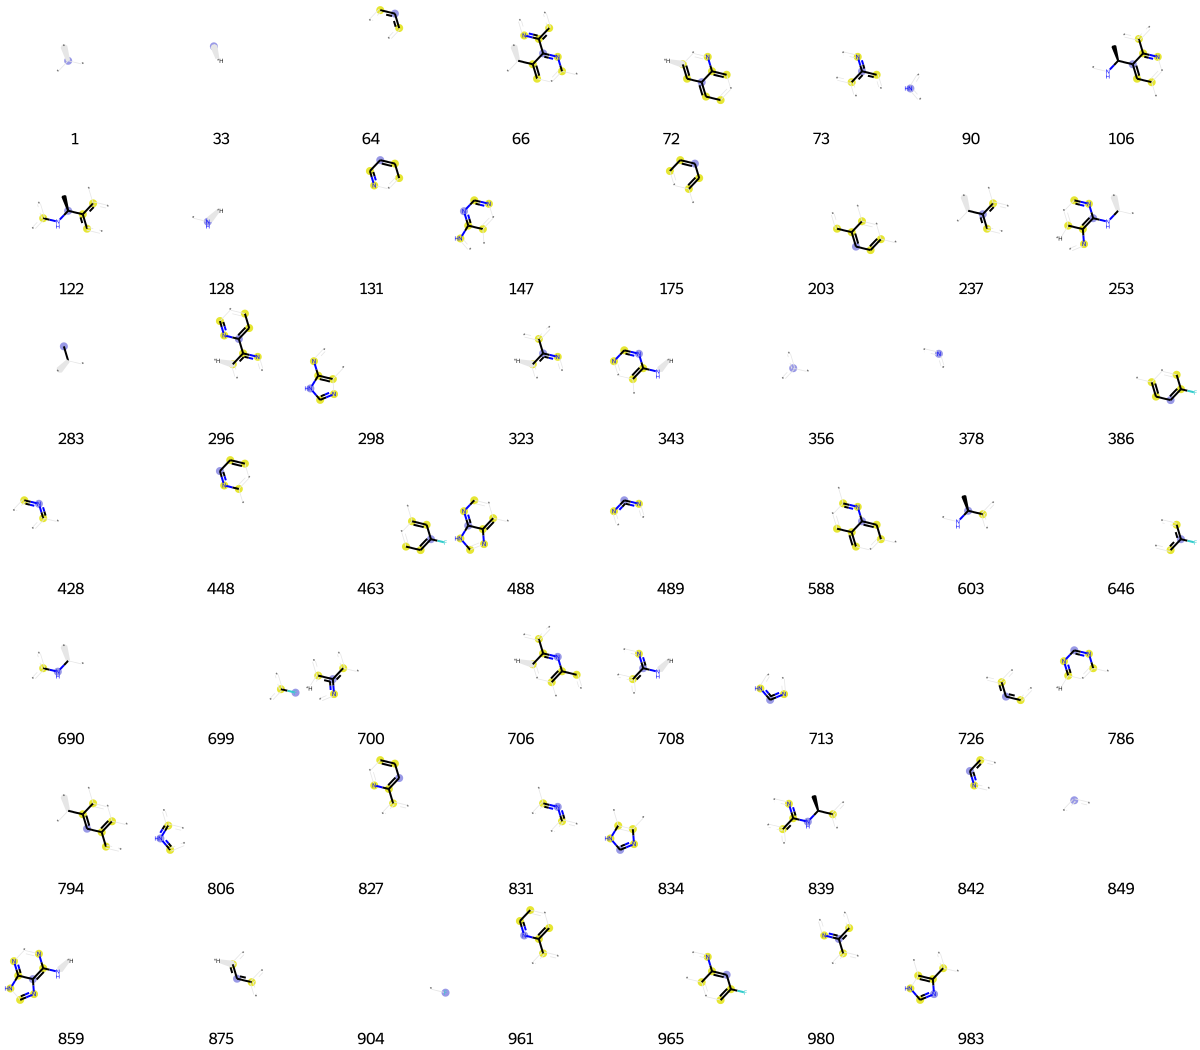

In [1760]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1761]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 53,
 69,
 80,
 102,
 128,
 191,
 214,
 237,
 245,
 294,
 322,
 356,
 428,
 530,
 650,
 695,
 718,
 726,
 792,
 807,
 843,
 849,
 893,
 1017]

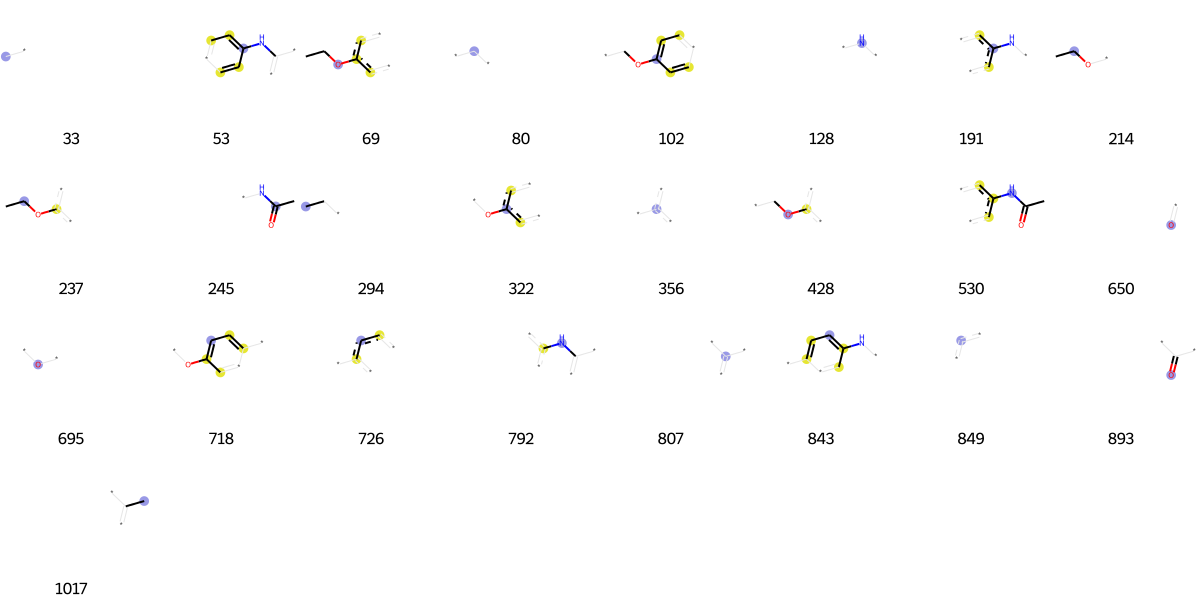

In [1762]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1763]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[18,
 33,
 43,
 64,
 81,
 121,
 128,
 175,
 200,
 202,
 208,
 267,
 273,
 354,
 356,
 367,
 378,
 418,
 433,
 464,
 465,
 471,
 486,
 488,
 641,
 650,
 656,
 674,
 698,
 725,
 726,
 792,
 807,
 830,
 832,
 842,
 849,
 852,
 875,
 893,
 931,
 935,
 947,
 975,
 982]

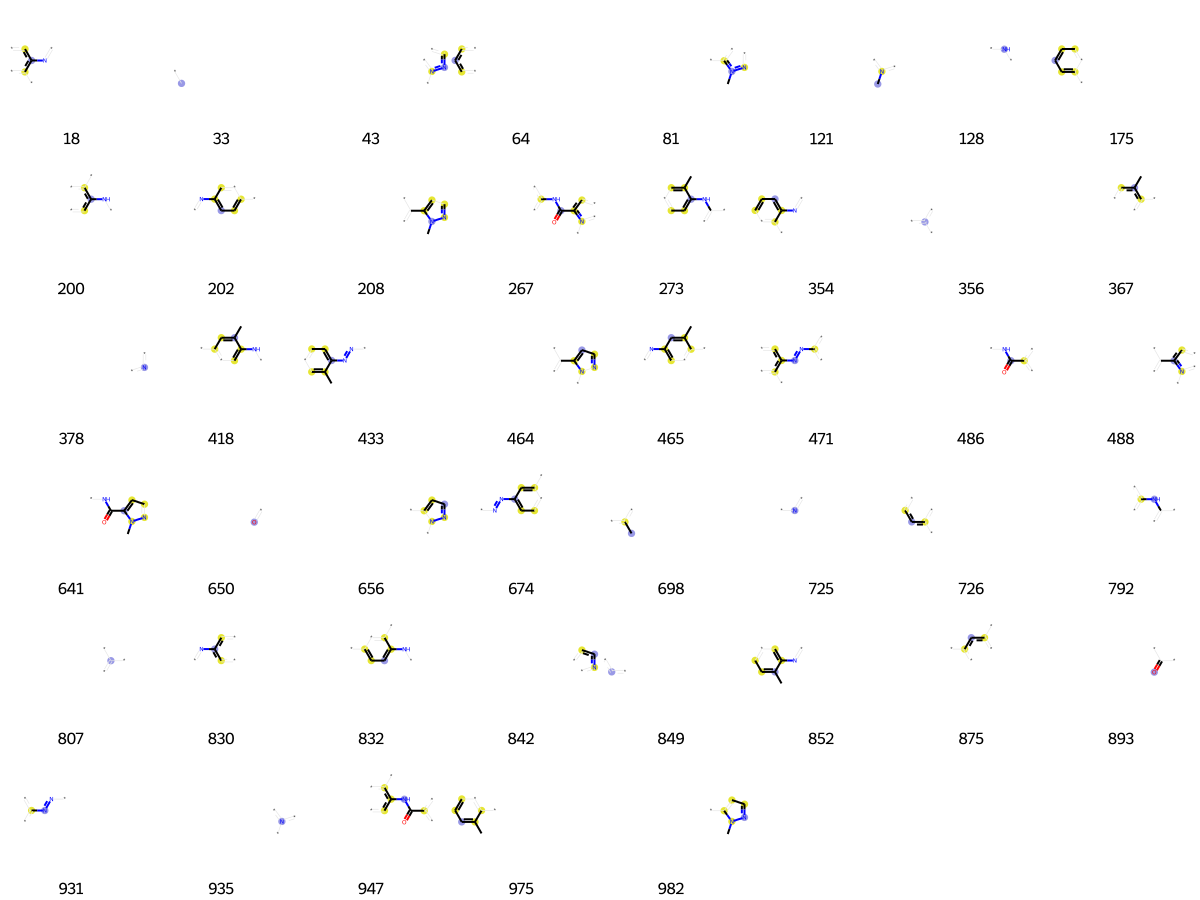

In [1764]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1765]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 68,
 171,
 250,
 287,
 356,
 367,
 578,
 583,
 650,
 667,
 698,
 715,
 726,
 741,
 753,
 785,
 790,
 807,
 838,
 849,
 875,
 916,
 939]

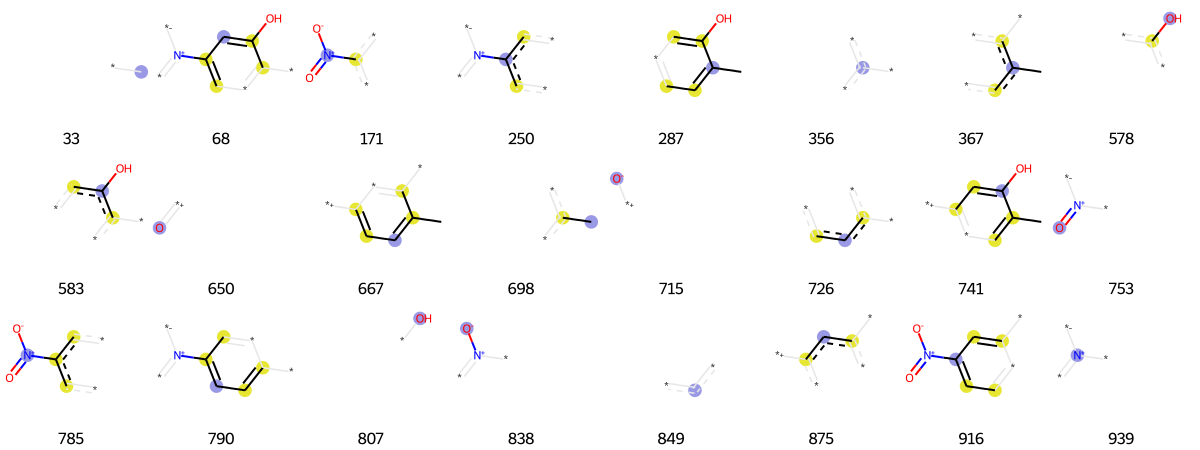

In [1766]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1767]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 8,
 26,
 29,
 33,
 36,
 71,
 72,
 80,
 138,
 141,
 144,
 233,
 243,
 250,
 263,
 268,
 283,
 301,
 324,
 360,
 389,
 453,
 500,
 519,
 522,
 528,
 537,
 540,
 562,
 590,
 612,
 622,
 650,
 669,
 713,
 739,
 760,
 775,
 784,
 807,
 861,
 893,
 926,
 927,
 955,
 956,
 999,
 1019]

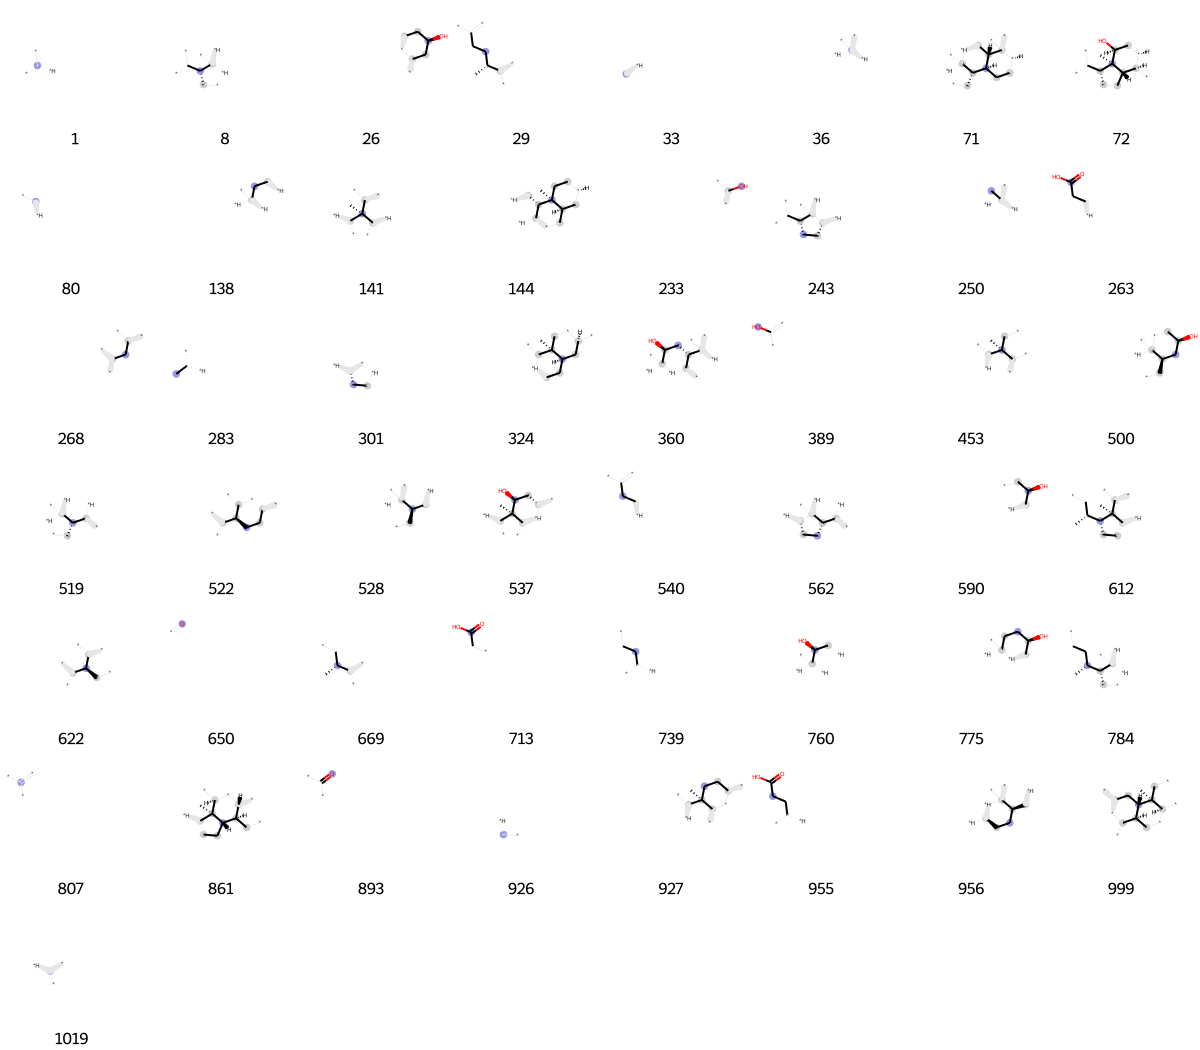

In [1768]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1769]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 33,
 115,
 147,
 226,
 227,
 283,
 340,
 357,
 389,
 418,
 650,
 669,
 727,
 786,
 807,
 820,
 893]

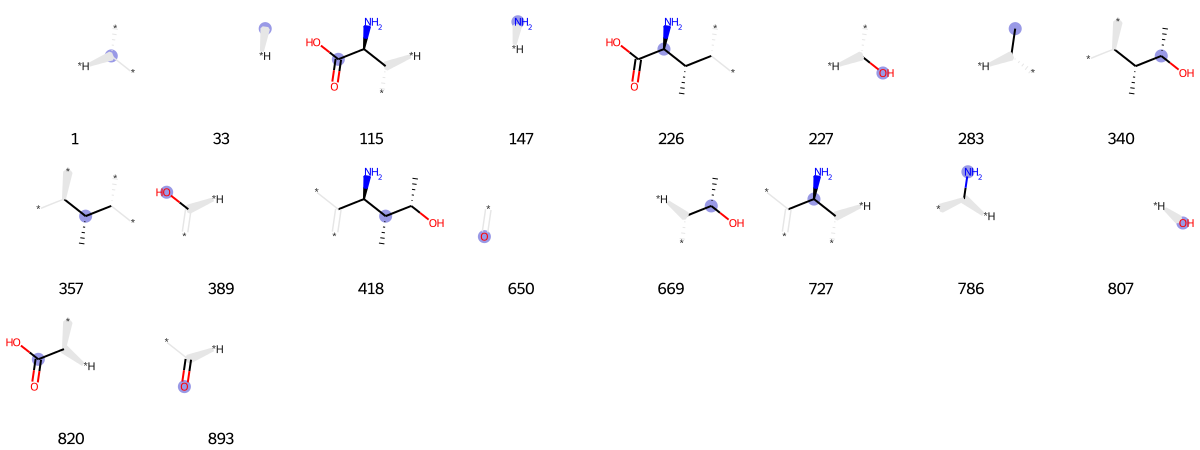

In [1770]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1771]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[46,
 64,
 72,
 80,
 90,
 98,
 121,
 129,
 131,
 136,
 172,
 175,
 197,
 216,
 233,
 243,
 284,
 305,
 310,
 343,
 356,
 378,
 381,
 407,
 428,
 448,
 456,
 492,
 507,
 514,
 528,
 561,
 580,
 624,
 650,
 656,
 659,
 687,
 722,
 724,
 726,
 730,
 741,
 783,
 801,
 804,
 807,
 816,
 841,
 842,
 849,
 865,
 881,
 893,
 896,
 913,
 926,
 935,
 960,
 996]

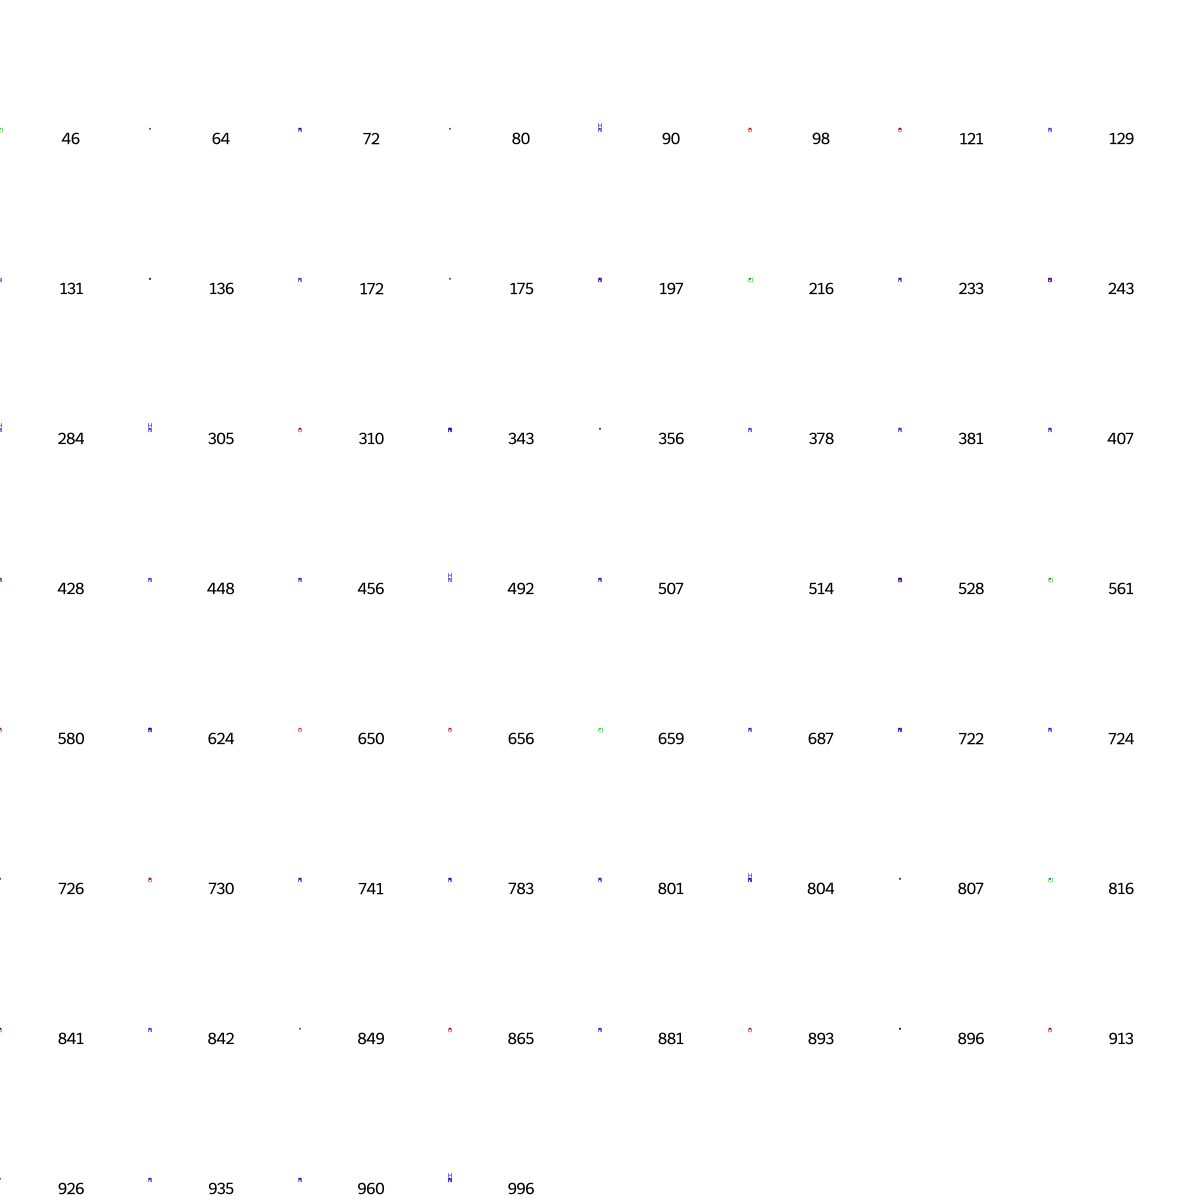

In [1772]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1773]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 33,
 74,
 80,
 117,
 128,
 147,
 173,
 197,
 214,
 283,
 294,
 379,
 431,
 458,
 534,
 573,
 650,
 656,
 667,
 677,
 680,
 689,
 695,
 698,
 726,
 736,
 739,
 759,
 774,
 807,
 823,
 836,
 837,
 893,
 897,
 928,
 938,
 960,
 1003,
 1019]

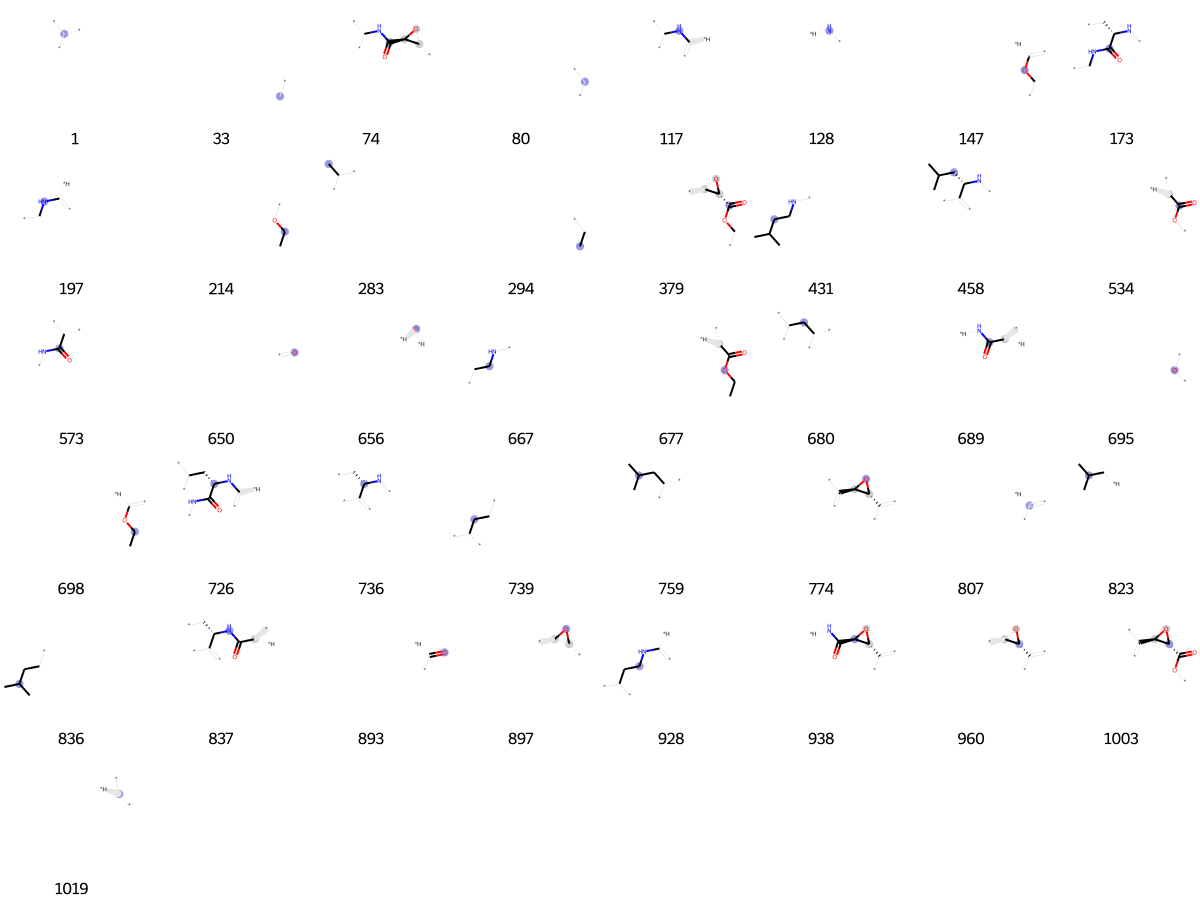

In [1774]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1775]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 7,
 11,
 16,
 29,
 33,
 35,
 45,
 77,
 80,
 90,
 102,
 112,
 128,
 158,
 197,
 255,
 259,
 293,
 294,
 305,
 314,
 315,
 333,
 356,
 360,
 367,
 379,
 380,
 385,
 427,
 457,
 486,
 520,
 634,
 650,
 674,
 698,
 721,
 726,
 742,
 750,
 755,
 790,
 807,
 813,
 841,
 845,
 849,
 875,
 893,
 935,
 967,
 1007,
 1010,
 1023]

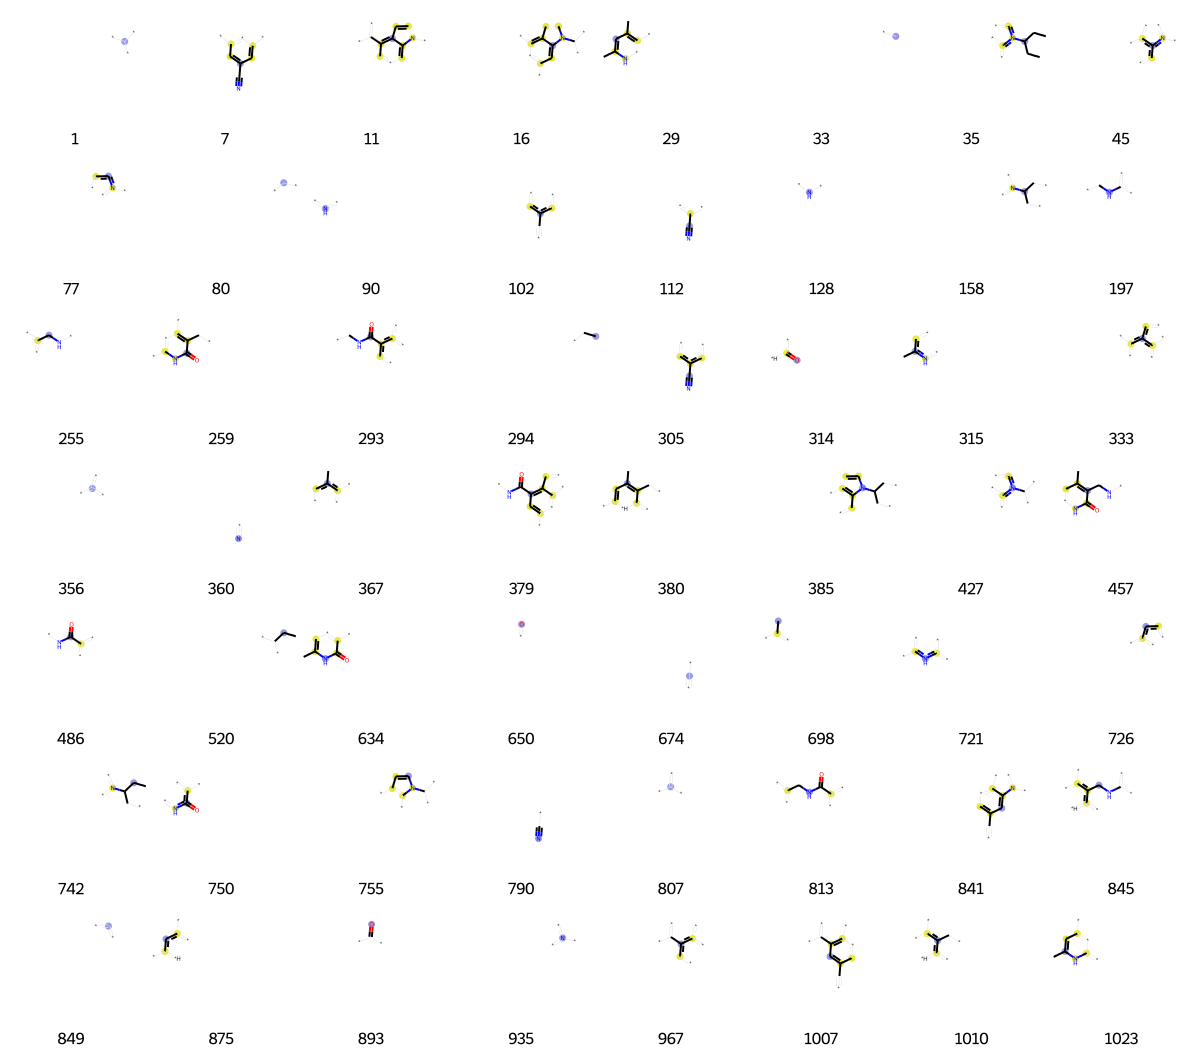

In [1776]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1777]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 3,
 29,
 33,
 79,
 80,
 144,
 222,
 249,
 310,
 339,
 356,
 451,
 482,
 512,
 578,
 583,
 614,
 695,
 722,
 726,
 730,
 807,
 841,
 849,
 875,
 882,
 946,
 966]

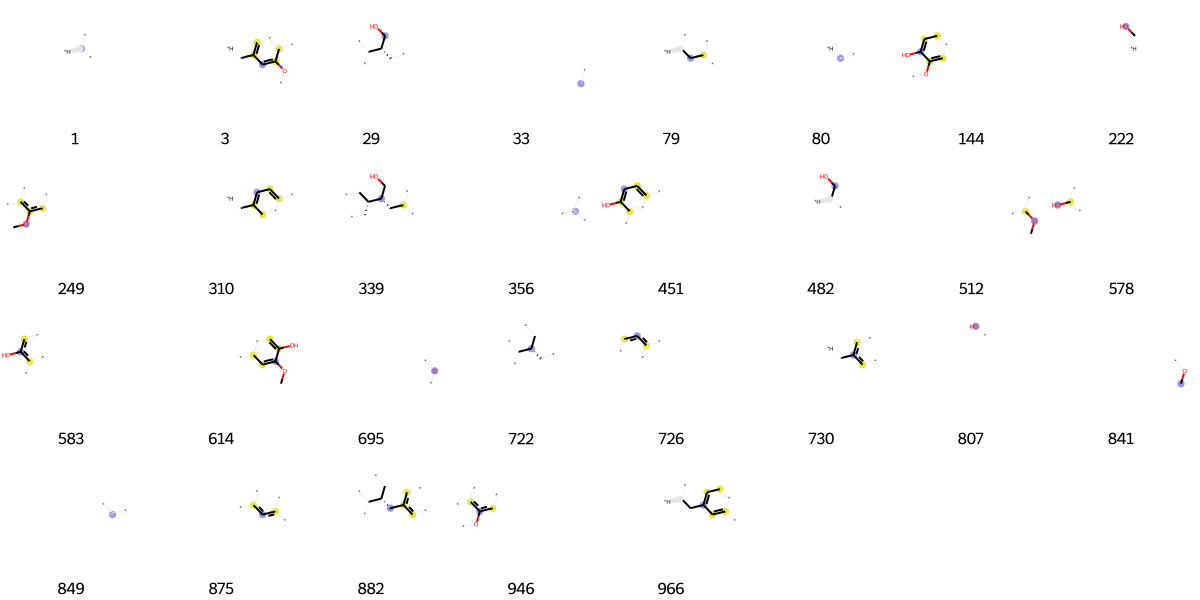

In [1778]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1779]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[2,
 4,
 17,
 33,
 64,
 70,
 72,
 80,
 96,
 114,
 121,
 132,
 147,
 151,
 175,
 220,
 289,
 301,
 313,
 326,
 356,
 378,
 389,
 393,
 456,
 507,
 514,
 566,
 576,
 617,
 650,
 669,
 695,
 726,
 745,
 747,
 799,
 807,
 849,
 865,
 881,
 884,
 890,
 893,
 926,
 935,
 958,
 993,
 1019]

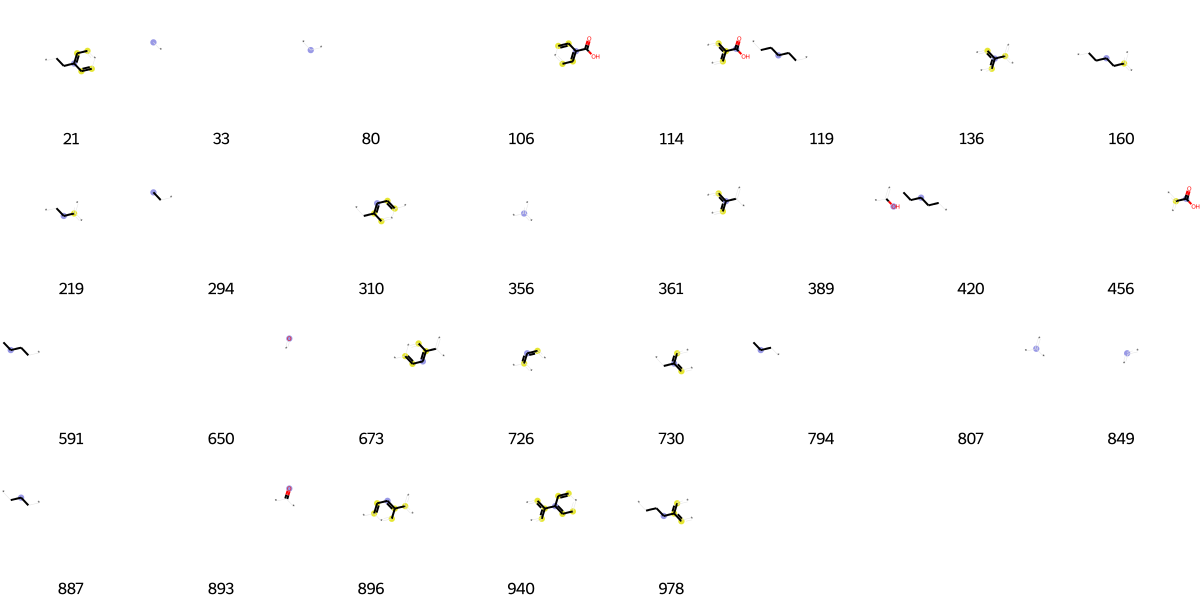

In [1780]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1781]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 15,
 33,
 42,
 50,
 64,
 73,
 80,
 105,
 117,
 128,
 165,
 178,
 216,
 249,
 271,
 283,
 333,
 356,
 378,
 386,
 389,
 399,
 411,
 428,
 458,
 477,
 482,
 486,
 495,
 512,
 561,
 600,
 613,
 650,
 659,
 668,
 673,
 680,
 695,
 709,
 723,
 726,
 735,
 736,
 759,
 787,
 807,
 816,
 820,
 823,
 828,
 841,
 842,
 849,
 855,
 875,
 893,
 898,
 921,
 932,
 933,
 935,
 946,
 977]

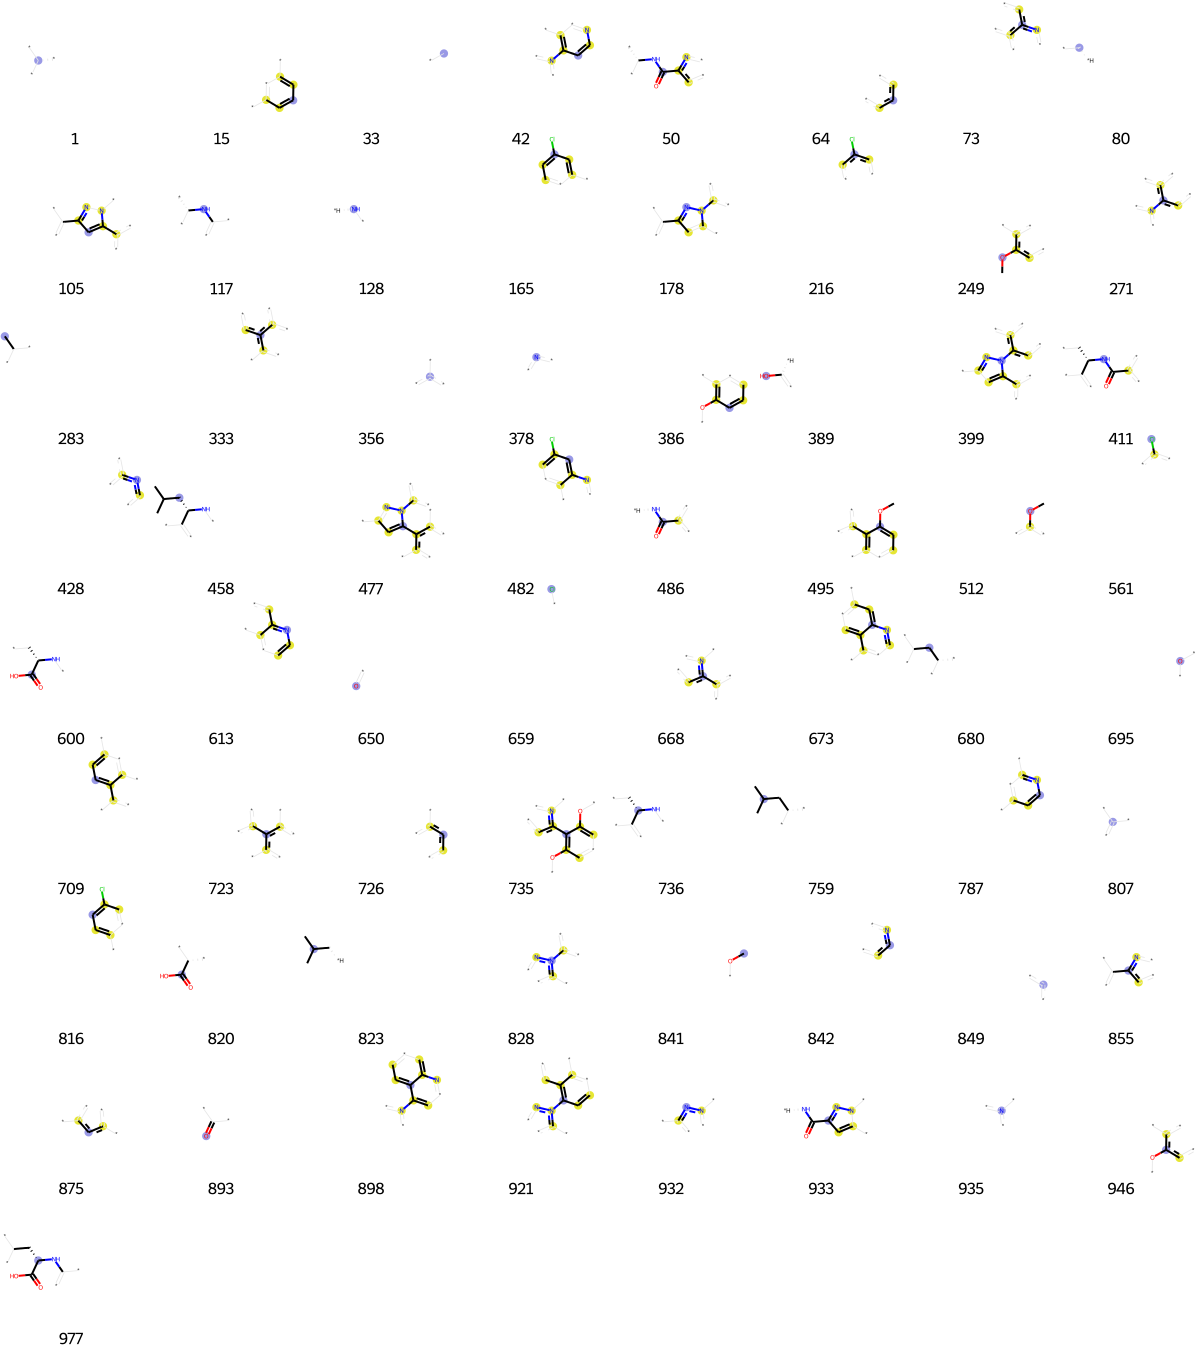

In [1782]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1783]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 33,
 64,
 121,
 136,
 140,
 175,
 207,
 237,
 356,
 372,
 378,
 389,
 407,
 527,
 563,
 585,
 625,
 635,
 726,
 736,
 739,
 823,
 849,
 874,
 887,
 926,
 935,
 947,
 962,
 980,
 1018,
 1019]

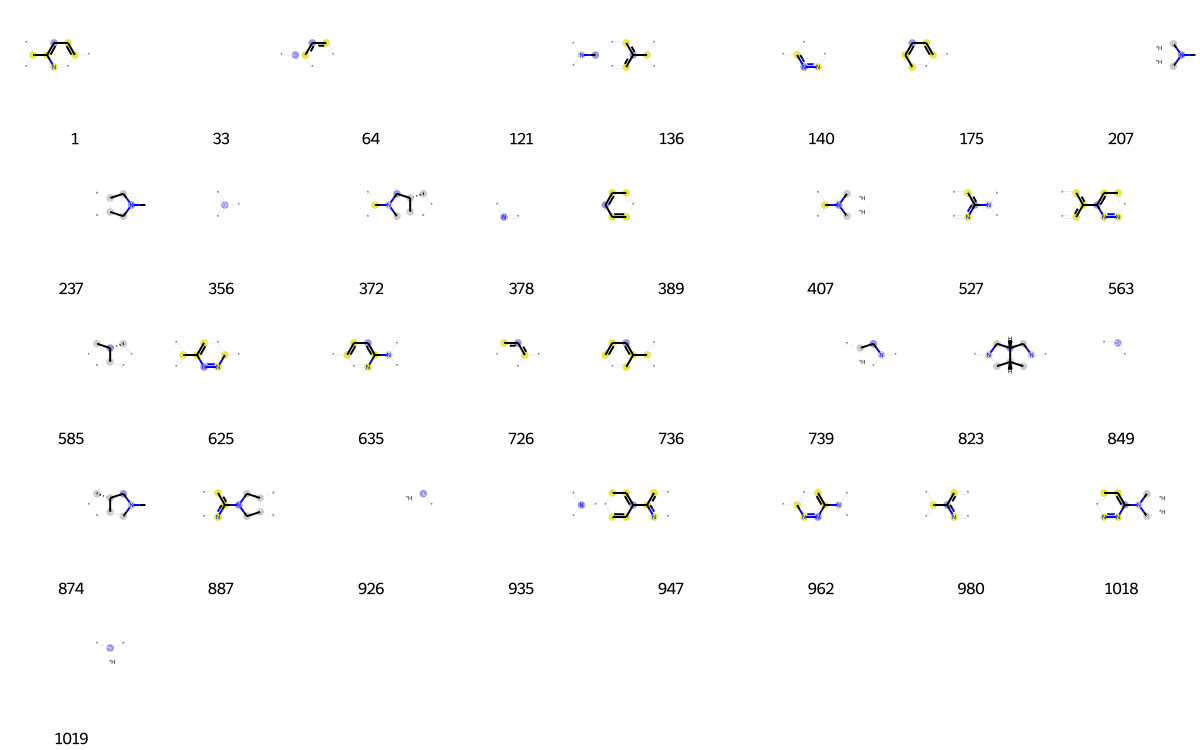

In [1784]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1785]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[3,
 8,
 15,
 25,
 33,
 43,
 64,
 80,
 94,
 114,
 157,
 226,
 236,
 249,
 271,
 322,
 332,
 356,
 371,
 378,
 379,
 389,
 393,
 407,
 429,
 456,
 484,
 491,
 496,
 498,
 512,
 525,
 562,
 582,
 594,
 641,
 650,
 687,
 695,
 699,
 706,
 713,
 722,
 726,
 749,
 770,
 781,
 801,
 807,
 809,
 816,
 841,
 849,
 875,
 893,
 898,
 904,
 915,
 926,
 927,
 935,
 946,
 948,
 980,
 1004,
 1019]

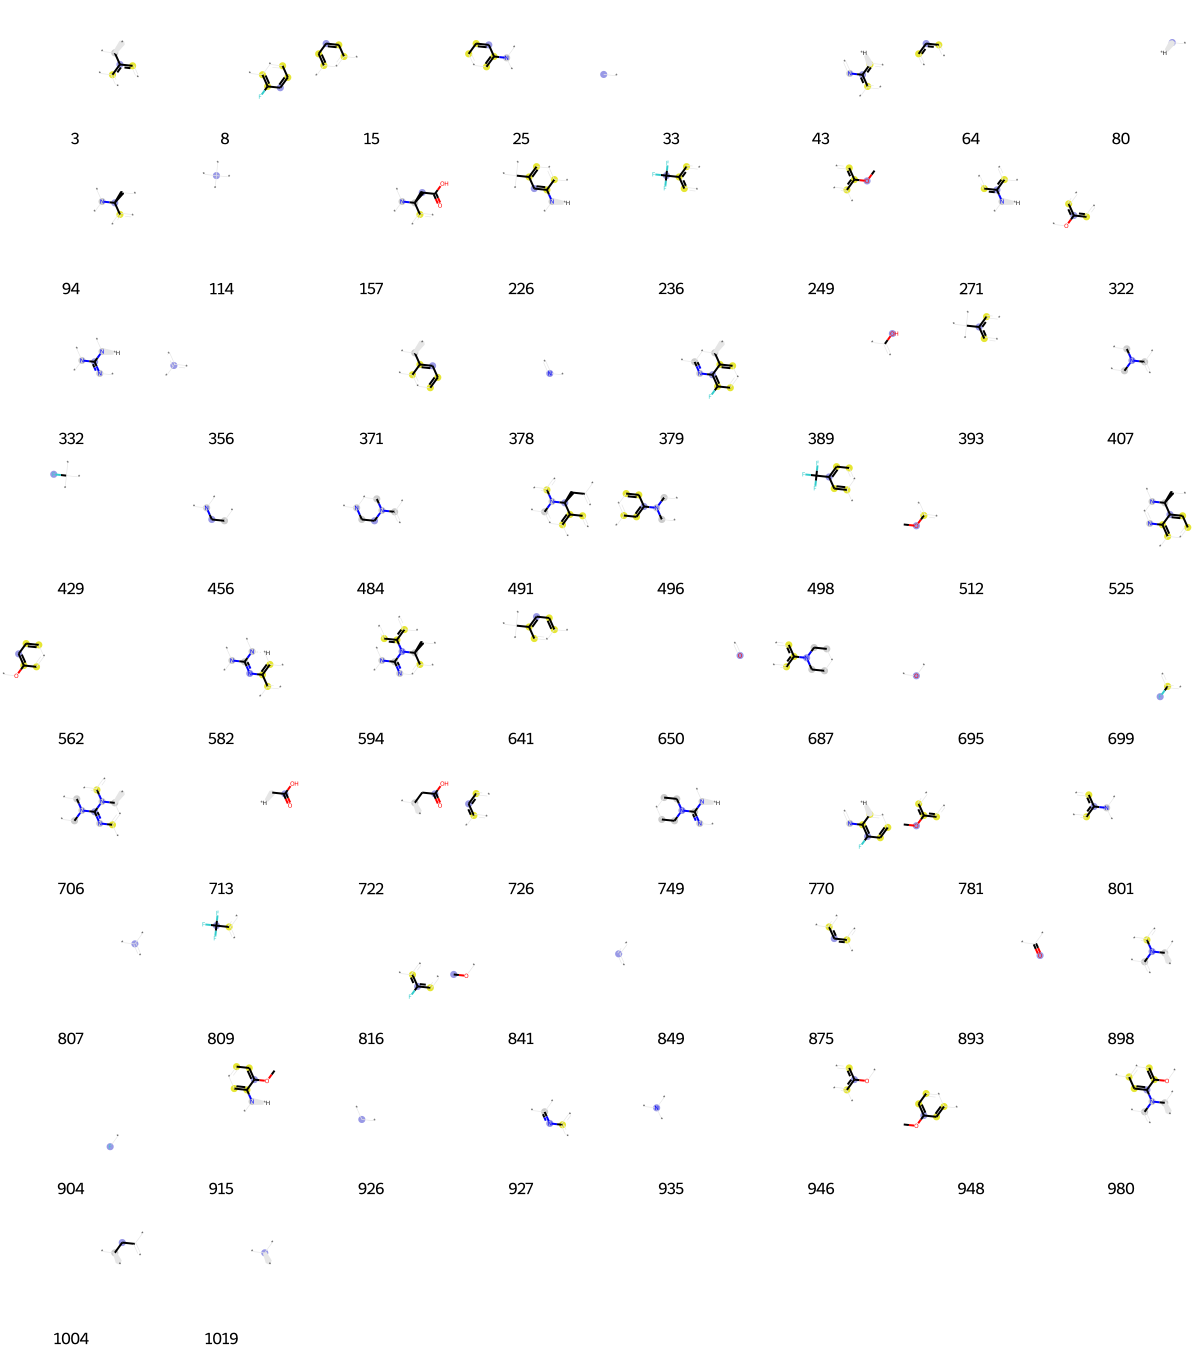

In [1786]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1787]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[8,
 15,
 33,
 43,
 58,
 62,
 64,
 80,
 106,
 114,
 128,
 136,
 197,
 213,
 222,
 236,
 240,
 242,
 293,
 312,
 356,
 373,
 378,
 393,
 429,
 473,
 486,
 498,
 511,
 543,
 552,
 577,
 638,
 650,
 667,
 675,
 698,
 726,
 736,
 742,
 774,
 806,
 807,
 809,
 821,
 828,
 831,
 849,
 852,
 863,
 875,
 887,
 893,
 904,
 913,
 935,
 967,
 980,
 993]

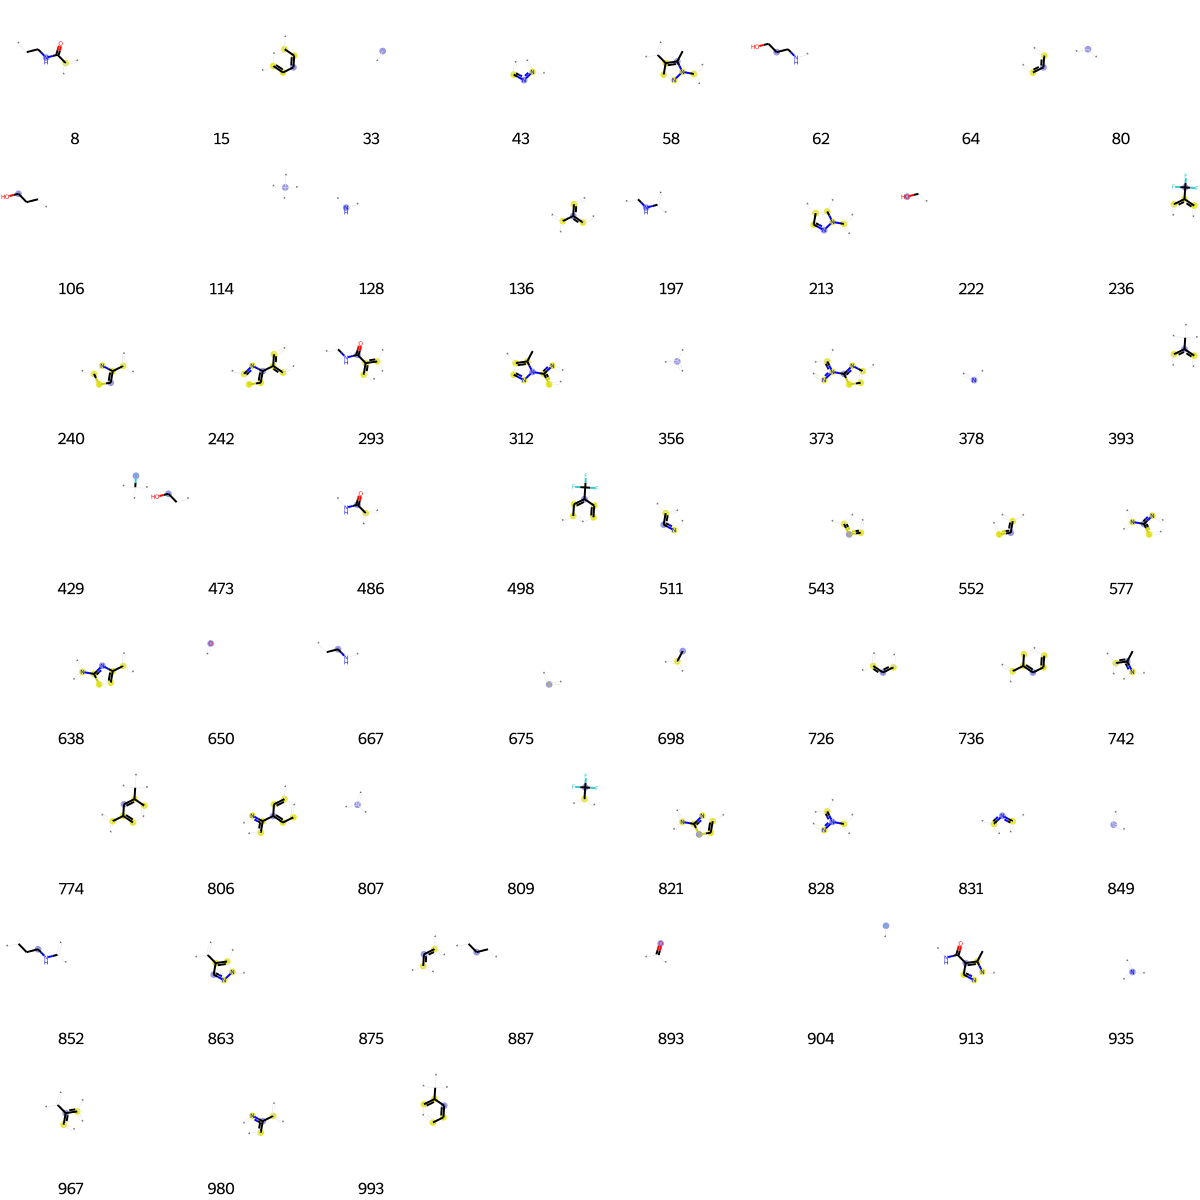

In [1788]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1789]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[4,
 15,
 25,
 31,
 33,
 42,
 64,
 80,
 90,
 96,
 107,
 113,
 175,
 202,
 281,
 314,
 322,
 329,
 356,
 358,
 389,
 394,
 428,
 466,
 477,
 525,
 562,
 577,
 633,
 640,
 650,
 654,
 694,
 695,
 698,
 726,
 730,
 745,
 796,
 799,
 801,
 835,
 836,
 849,
 875,
 879,
 935,
 951,
 1009,
 1013]

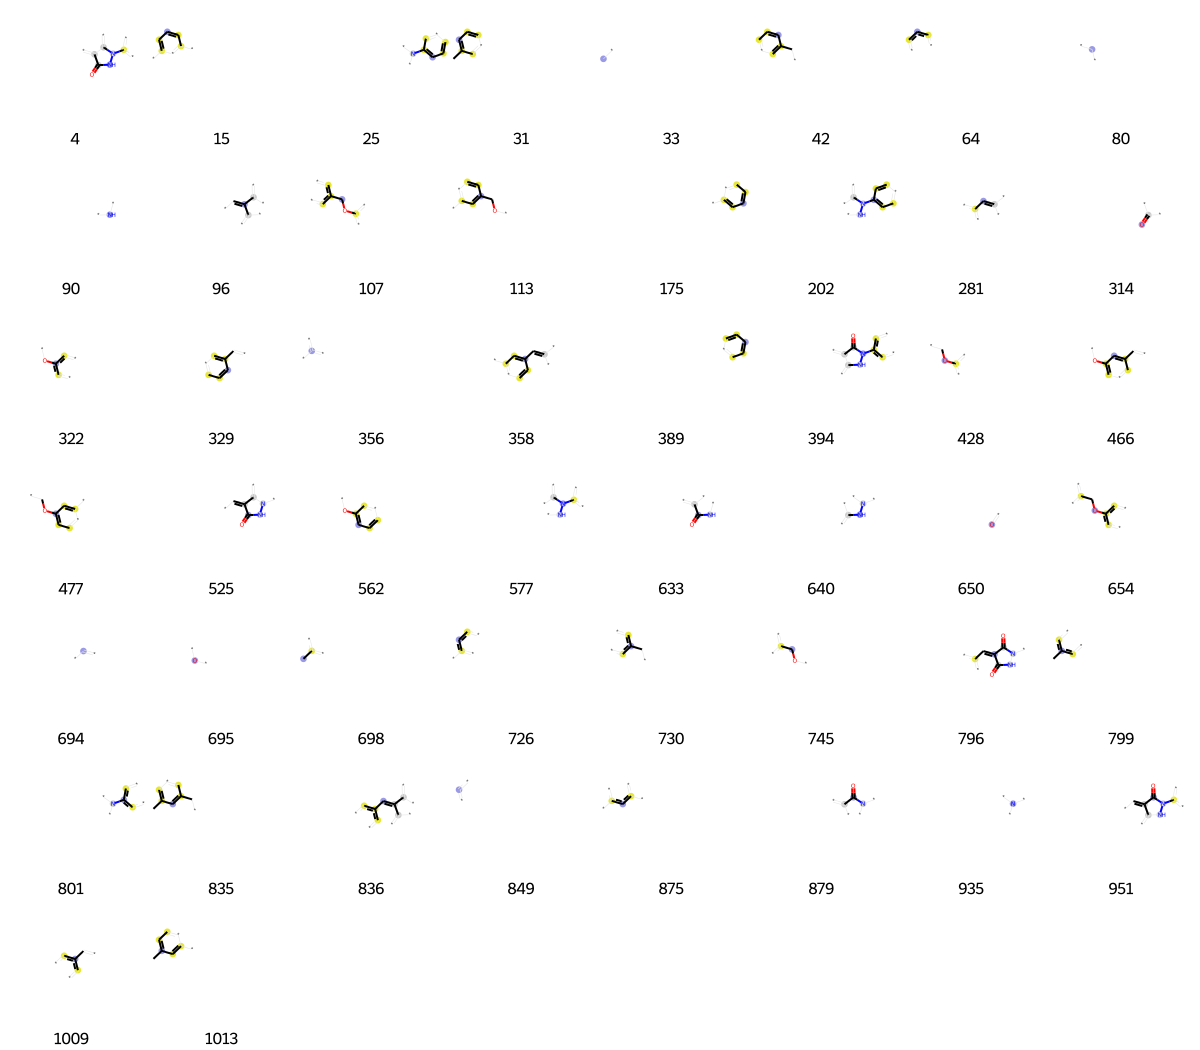

In [1790]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1791]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[33,
 43,
 46,
 50,
 58,
 112,
 128,
 184,
 191,
 213,
 216,
 218,
 231,
 233,
 271,
 301,
 335,
 356,
 360,
 361,
 378,
 381,
 407,
 416,
 417,
 440,
 456,
 486,
 511,
 523,
 549,
 558,
 561,
 650,
 656,
 659,
 674,
 698,
 726,
 742,
 790,
 792,
 801,
 807,
 816,
 828,
 830,
 838,
 843,
 847,
 849,
 863,
 875,
 879,
 886,
 891,
 893,
 913,
 926,
 935,
 950,
 954,
 967,
 1019]

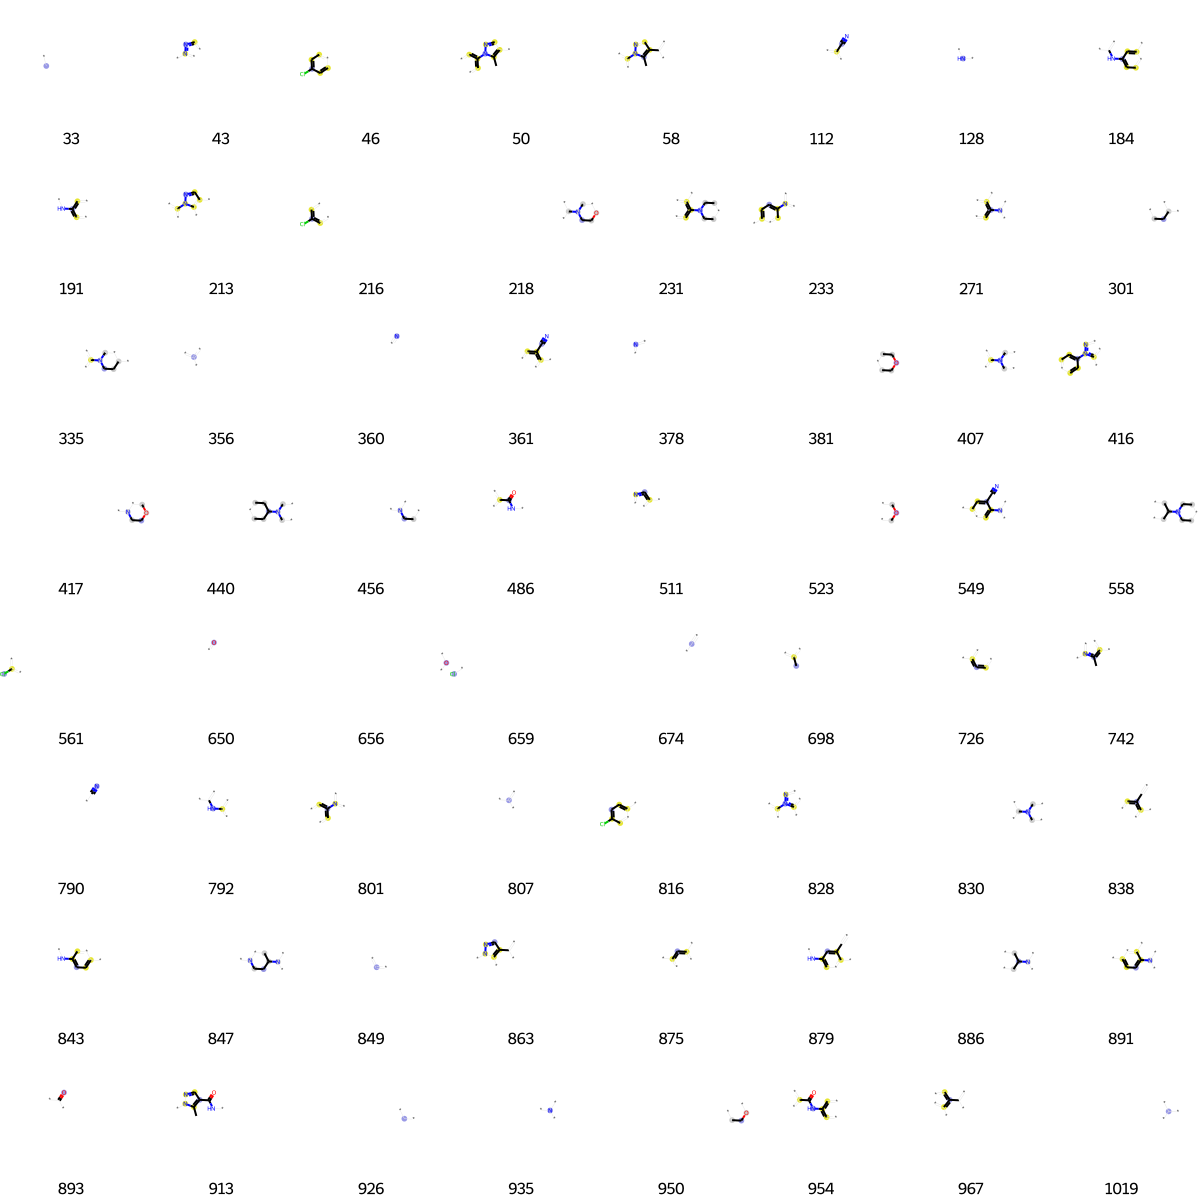

In [1792]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1793]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[8,
 15,
 17,
 33,
 64,
 114,
 128,
 169,
 184,
 191,
 236,
 248,
 356,
 361,
 378,
 393,
 429,
 484,
 485,
 486,
 498,
 518,
 526,
 632,
 650,
 656,
 697,
 698,
 703,
 707,
 726,
 730,
 771,
 792,
 807,
 809,
 849,
 875,
 893,
 904,
 954,
 961,
 990,
 993]

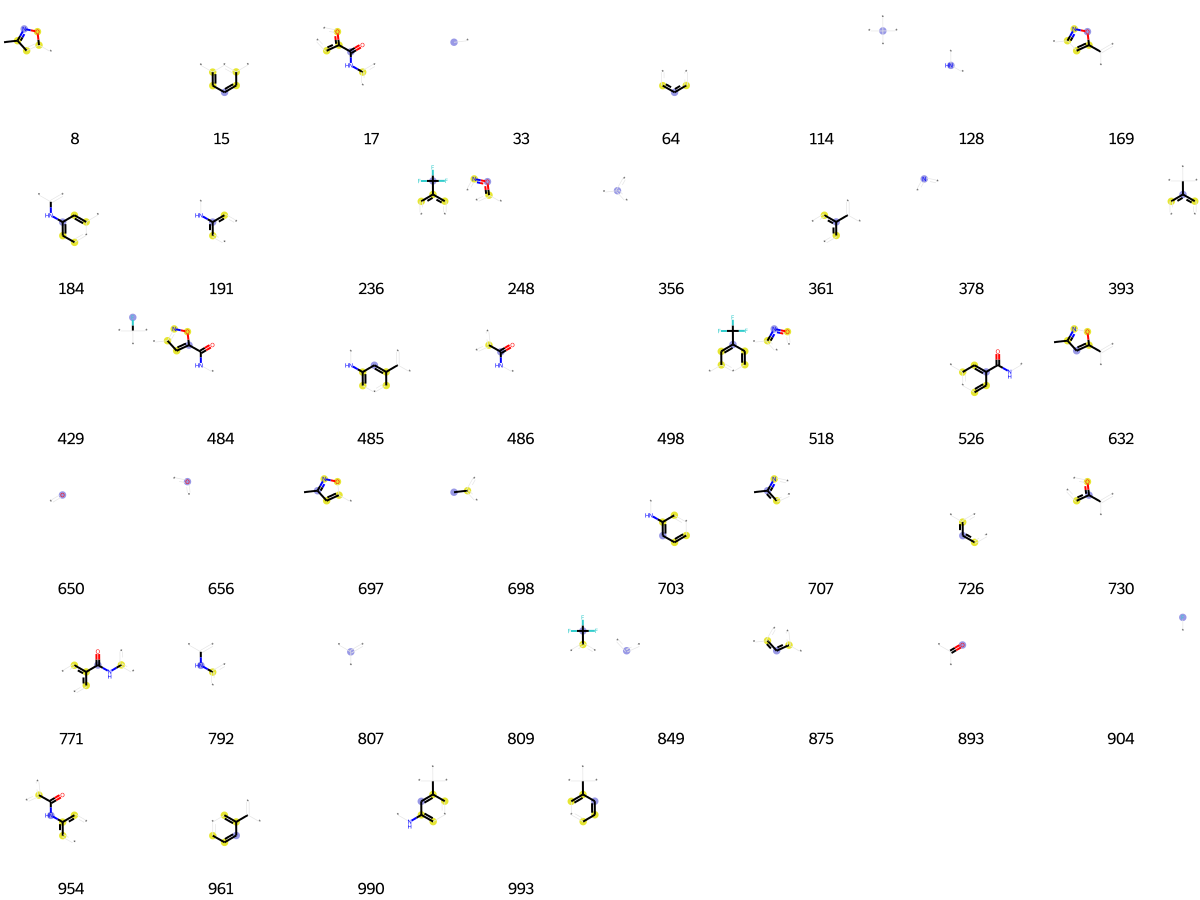

In [1794]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1795]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[10,
 13,
 33,
 80,
 94,
 102,
 128,
 139,
 140,
 197,
 221,
 249,
 255,
 265,
 274,
 310,
 322,
 356,
 361,
 428,
 486,
 512,
 514,
 526,
 549,
 638,
 650,
 652,
 673,
 693,
 695,
 718,
 726,
 730,
 807,
 813,
 815,
 841,
 849,
 875,
 881,
 893,
 927,
 946]

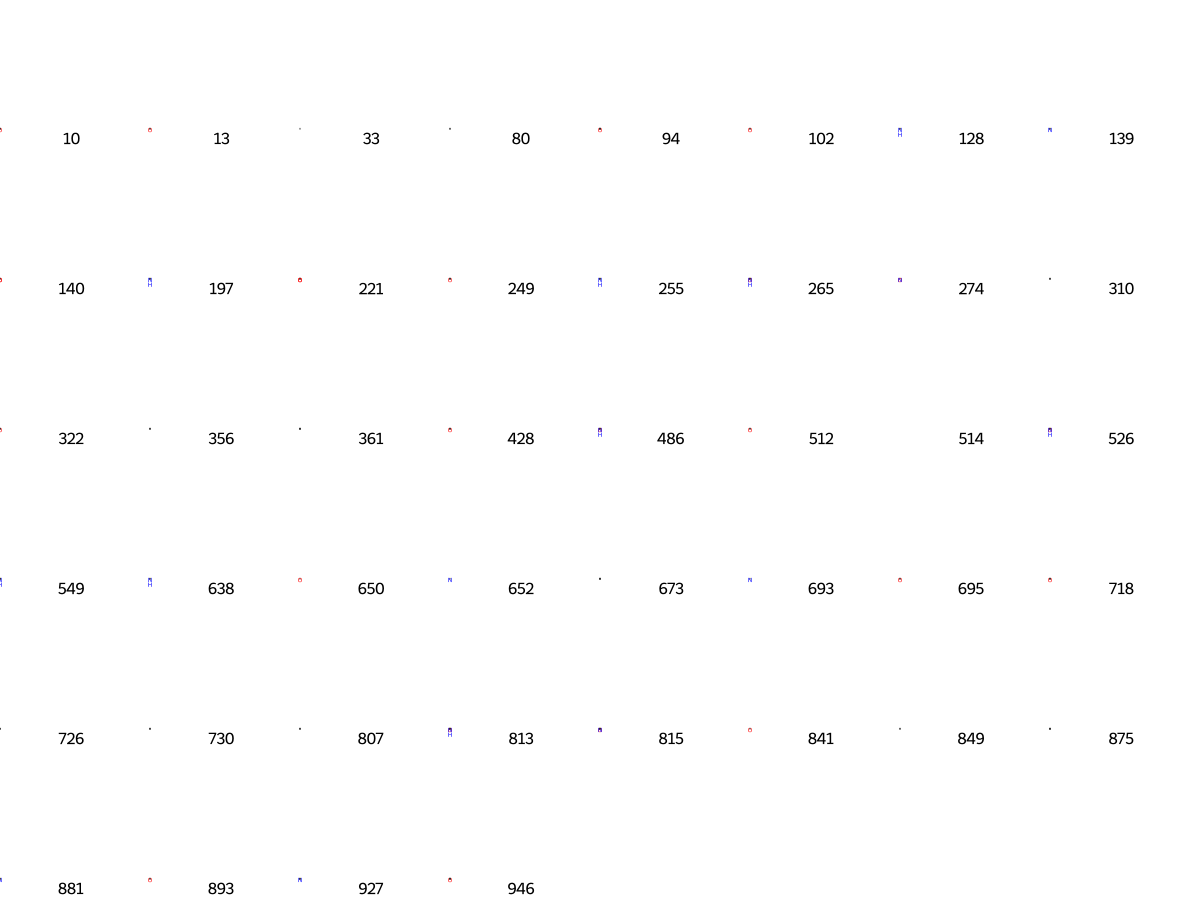

In [1796]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1797]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 4,
 15,
 33,
 64,
 80,
 114,
 183,
 255,
 273,
 283,
 284,
 301,
 310,
 319,
 322,
 325,
 334,
 341,
 351,
 356,
 369,
 389,
 392,
 432,
 446,
 456,
 548,
 561,
 562,
 598,
 639,
 650,
 678,
 695,
 726,
 730,
 739,
 770,
 780,
 805,
 807,
 829,
 849,
 875,
 893,
 913,
 915,
 919,
 926,
 935,
 953,
 976,
 985,
 1009,
 1019]

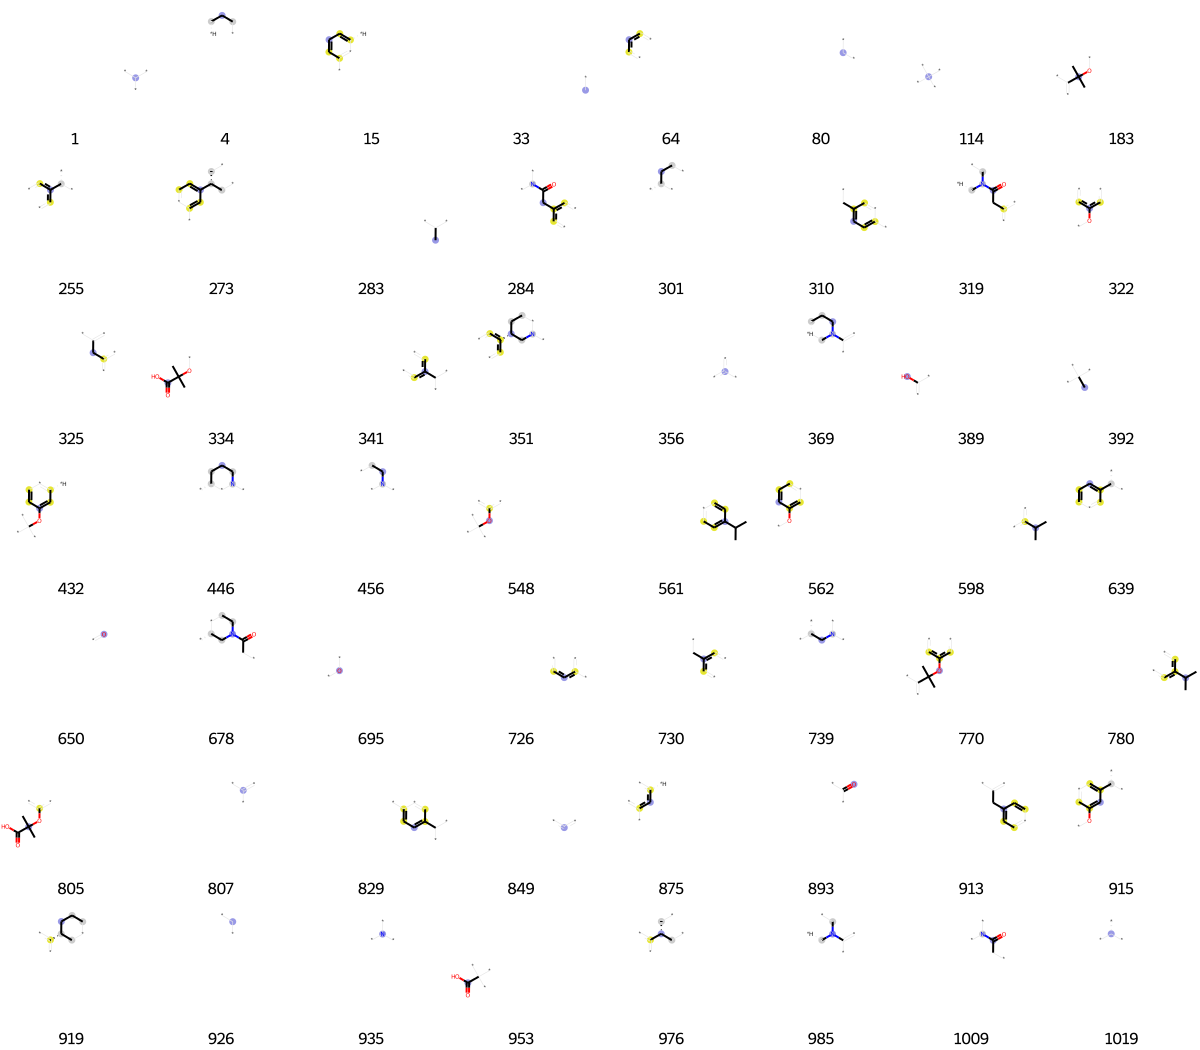

In [1798]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1799]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[4,
 33,
 34,
 80,
 119,
 161,
 175,
 271,
 294,
 322,
 356,
 498,
 512,
 549,
 550,
 583,
 588,
 626,
 650,
 675,
 694,
 695,
 718,
 726,
 744,
 781,
 807,
 818,
 841,
 849,
 875,
 893,
 899,
 917,
 935,
 948,
 949,
 1017,
 1020]

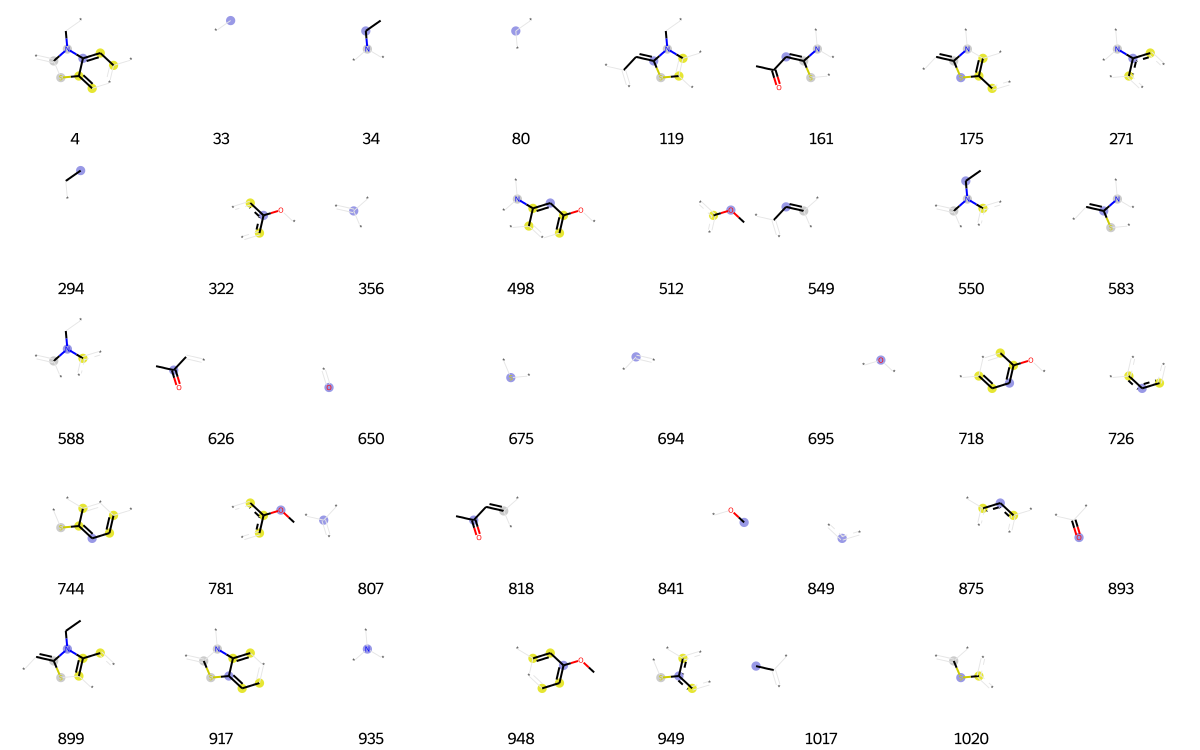

In [1800]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1801]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 3,
 4,
 15,
 33,
 64,
 90,
 119,
 128,
 164,
 201,
 233,
 283,
 301,
 304,
 314,
 356,
 371,
 379,
 413,
 416,
 444,
 456,
 466,
 472,
 514,
 521,
 613,
 636,
 650,
 721,
 726,
 751,
 758,
 759,
 784,
 807,
 849,
 926,
 935,
 970,
 985,
 987,
 1019]

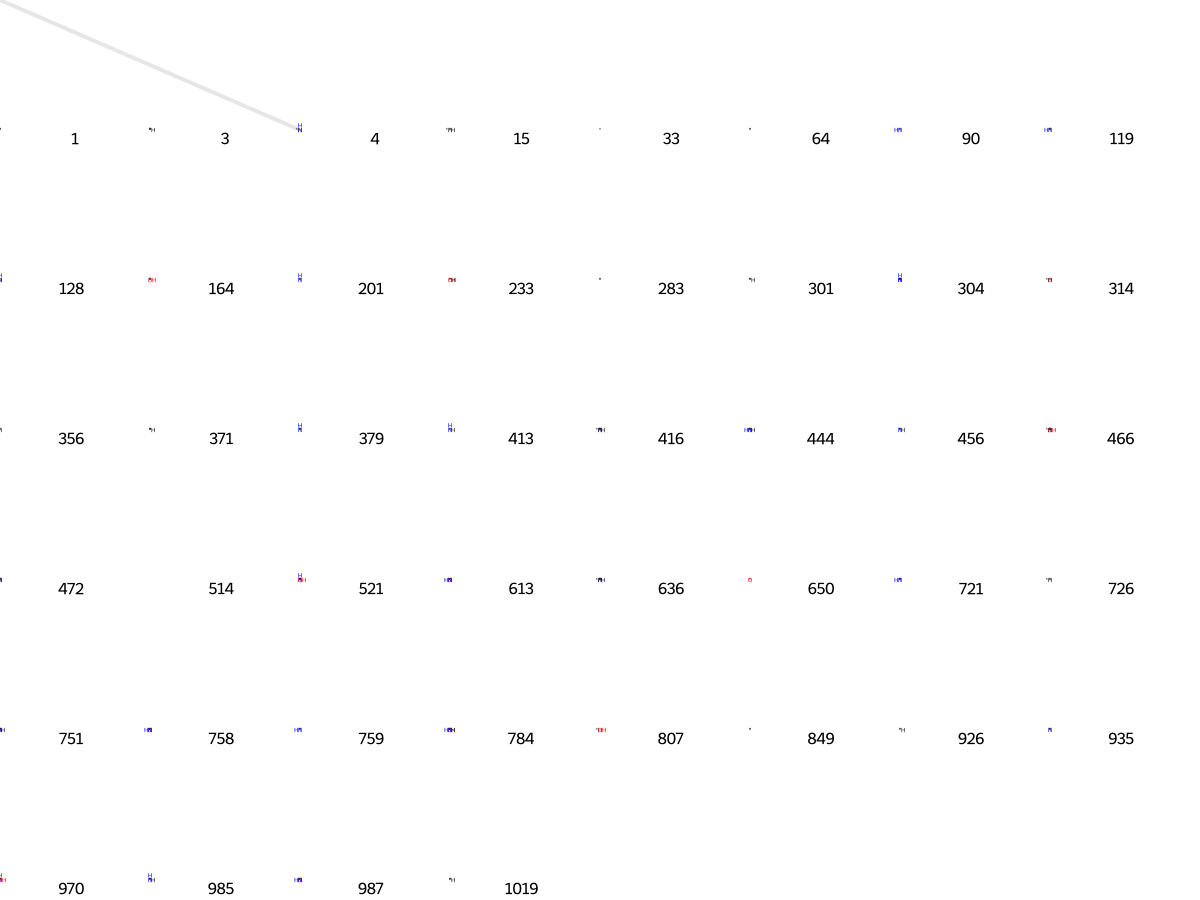

In [1802]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])